# Bibliotecas

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Dados

In [295]:
df = pd.read_csv("dataset/flight_delay.csv")

df.head()

,flight_date,weekday_name,airline_code,airline_description,dot_code,dot_description,flight_number,flight_id,route_id,origin,...,delay_due_late_aircraft,main_delay_cause,cascade_delay_flag,dep_delay_quartile,taxi_out_quartile,taxi_in_quartile,distance_quartile,arr_delay_quartile,range_arr_delay,scheduled_dep_period
0,2023-01-04,Wednesday,9E,Endeavor Air Inc.,20363,Endeavor Air Inc.: 9E,5483,9E 5483,ABE to ATL,ABE,...,291.0,Late Aircraft,1,4,1,2,3,4,Delay 121-360 min,Morning
1,2023-01-02,Monday,G4,Allegiant Air,20368,Allegiant Air: G4,338,G4 338,ABE to BNA,ABE,...,19.0,Late Aircraft,1,4,2,3,3,4,Delay 15-50 min,Night
2,2023-01-31,Tuesday,OH,PSA Airlines Inc.,20397,PSA Airlines Inc.: OH,5502,OH 5502,ABE to CLT,ABE,...,98.0,Late Aircraft,1,4,3,4,2,4,Delay 51-120 min,Afternoon
3,2023-01-04,Wednesday,OH,PSA Airlines Inc.,20397,PSA Airlines Inc.: OH,5052,OH 5052,ABE to CLT,ABE,...,231.0,Late Aircraft,1,4,2,2,2,4,Delay 121-360 min,Afternoon
4,2023-01-25,Wednesday,OH,PSA Airlines Inc.,20397,PSA Airlines Inc.: OH,5052,OH 5052,ABE to CLT,ABE,...,49.0,Weather,1,4,4,2,2,4,Delay 121-360 min,Morning


In [296]:
print(df.columns)

Index(['flight_date', 'weekday_name', 'airline_code', 'airline_description',
       'dot_code', 'dot_description', 'flight_number', 'flight_id', 'route_id',
       'origin', 'origin_city', 'destination', 'destination_city',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'taxi_time_total', 'crs_arr_time', 'arr_time',
       'arr_delay', 'delayed', 'cancelled', 'cancellation_code',
       'cancellation_cause', 'diverted', 'crs_elapsed_time', 'elapsed_time',
       'recovered_time', 'air_time', 'distance', 'delay_due_carrier',
       'delay_due_weather', 'delay_due_nas', 'delay_due_security',
       'delay_due_late_aircraft', 'main_delay_cause', 'cascade_delay_flag',
       'dep_delay_quartile', 'taxi_out_quartile', 'taxi_in_quartile',
       'distance_quartile', 'arr_delay_quartile', 'range_arr_delay',
       'scheduled_dep_period'],
      dtype='object')


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538837 entries, 0 to 538836
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   flight_date              538837 non-null  object 
 1   weekday_name             538837 non-null  object 
 2   airline_code             538837 non-null  object 
 3   airline_description      538837 non-null  object 
 4   dot_code                 538837 non-null  int64  
 5   dot_description          538837 non-null  object 
 6   flight_number            538837 non-null  int64  
 7   flight_id                538837 non-null  object 
 8   route_id                 538837 non-null  object 
 9   origin                   538837 non-null  object 
 10  origin_city              538837 non-null  object 
 11  destination              538837 non-null  object 
 12  destination_city         538837 non-null  object 
 13  crs_dep_time             538837 non-null  object 
 14  dep_

# Análise Exploratória dos Dados

## Visão Geral dos Dados Operacionais

In [298]:
# Período Analisado
df['flight_date'] = pd.to_datetime(df['flight_date'])
start_date = df['flight_date'].min().strftime('%d de %B de %Y') 
end_date = df['flight_date'].max().strftime('%d de %B de %Y') 
print(f"Período Analisado: de {start_date} a {end_date}")

print()

# Cobertura geográfica
unique_origin = df['origin'].nunique()
unique_destination = df['destination'].nunique()
print(f"Aeroportos de Origem Únicos: {unique_origin}")
print()
print(f"Aeroportos de Destino Únicos: {unique_destination}")

print()

# Para estados, seria mais complexo, pois você precisaria mapear os códigos de aeroporto
# ou cidade para seus respectivos estados. Se você não tiver essa informação prontamente,
# pode ser mais simples focar no número de aeroportos ou cidades.
# Se você tiver uma coluna 'origin_state' ou 'destination_state':
# estados_unicos = pd.concat([df_final['origin_state'], df_final['destination_state']]).nunique()
# print(f"Estados únicos cobertos: {estados_unicos}")


print(f"Total de Voos Analisados: {len(df)}")

print()

delayed_count = df['delayed'].sum() # delayed == 1 para atrasado
percent_delayed = (delayed_count / len(df)) * 100
print(f"Atrasados: {delayed_count} - {percent_delayed:.2f}%")

print()

cancelled_count = df['cancelled'].sum() # cancelled == 1 para cancelado
percent_cancelled = (cancelled_count / len(df)) * 100
print(f"Cancelados: {cancelled_count} - {percent_cancelled:.2f}%")

print()

diverted_count = df['diverted'].sum() # diverted == 1 para desviado
percent_diverted = (diverted_count / len(df)) * 100
print(f"Desviados: {diverted_count} - {percent_diverted:.2f}%")

print()

# delayed se refere a voos que chegaram no destino inicial, mas atrasados
# cancelled não chegaram
# diverted chegaram em outro lugar
# OS VOOS NUNCA SAO AS TRES COISAS AO MESMO TEMPO

# podemos calcular os pontuais como:
ontime_count = len(df) - delayed_count - cancelled_count - diverted_count
percent_ontime = (ontime_count / len(df)) * 100
print(f"Pontuais: {ontime_count} - {percent_ontime:.2f}%")

print()

airline_count = df['airline_description'].nunique()
print(f"Companhias Aéreas: {airline_count}")

print()

route_count = df['route_id'].nunique()
print(f"Rotas: {route_count}")

print()

# flight_date precisa ser datetime para nunique() funcionar corretamente em datas distintas
df['flight_date'] = pd.to_datetime(df['flight_date'])
media_voos_dia = len(df) / df['flight_date'].nunique()
print(f"Média de Voos por Dia: {media_voos_dia:.0f}")



Período Analisado: de 01 de January de 2023 a 31 de January de 2023

Aeroportos de Origem Únicos: 339

Aeroportos de Destino Únicos: 339

Total de Voos Analisados: 538837

Atrasados: 116713 - 21.66%

Cancelados: 10295 - 1.91%

Desviados: 1345 - 0.25%

Pontuais: 410484 - 76.18%

Companhias Aéreas: 15

Rotas: 5581

Média de Voos por Dia: 17382


## Heatmap de Correlação entre Variáveis (Multivariada)

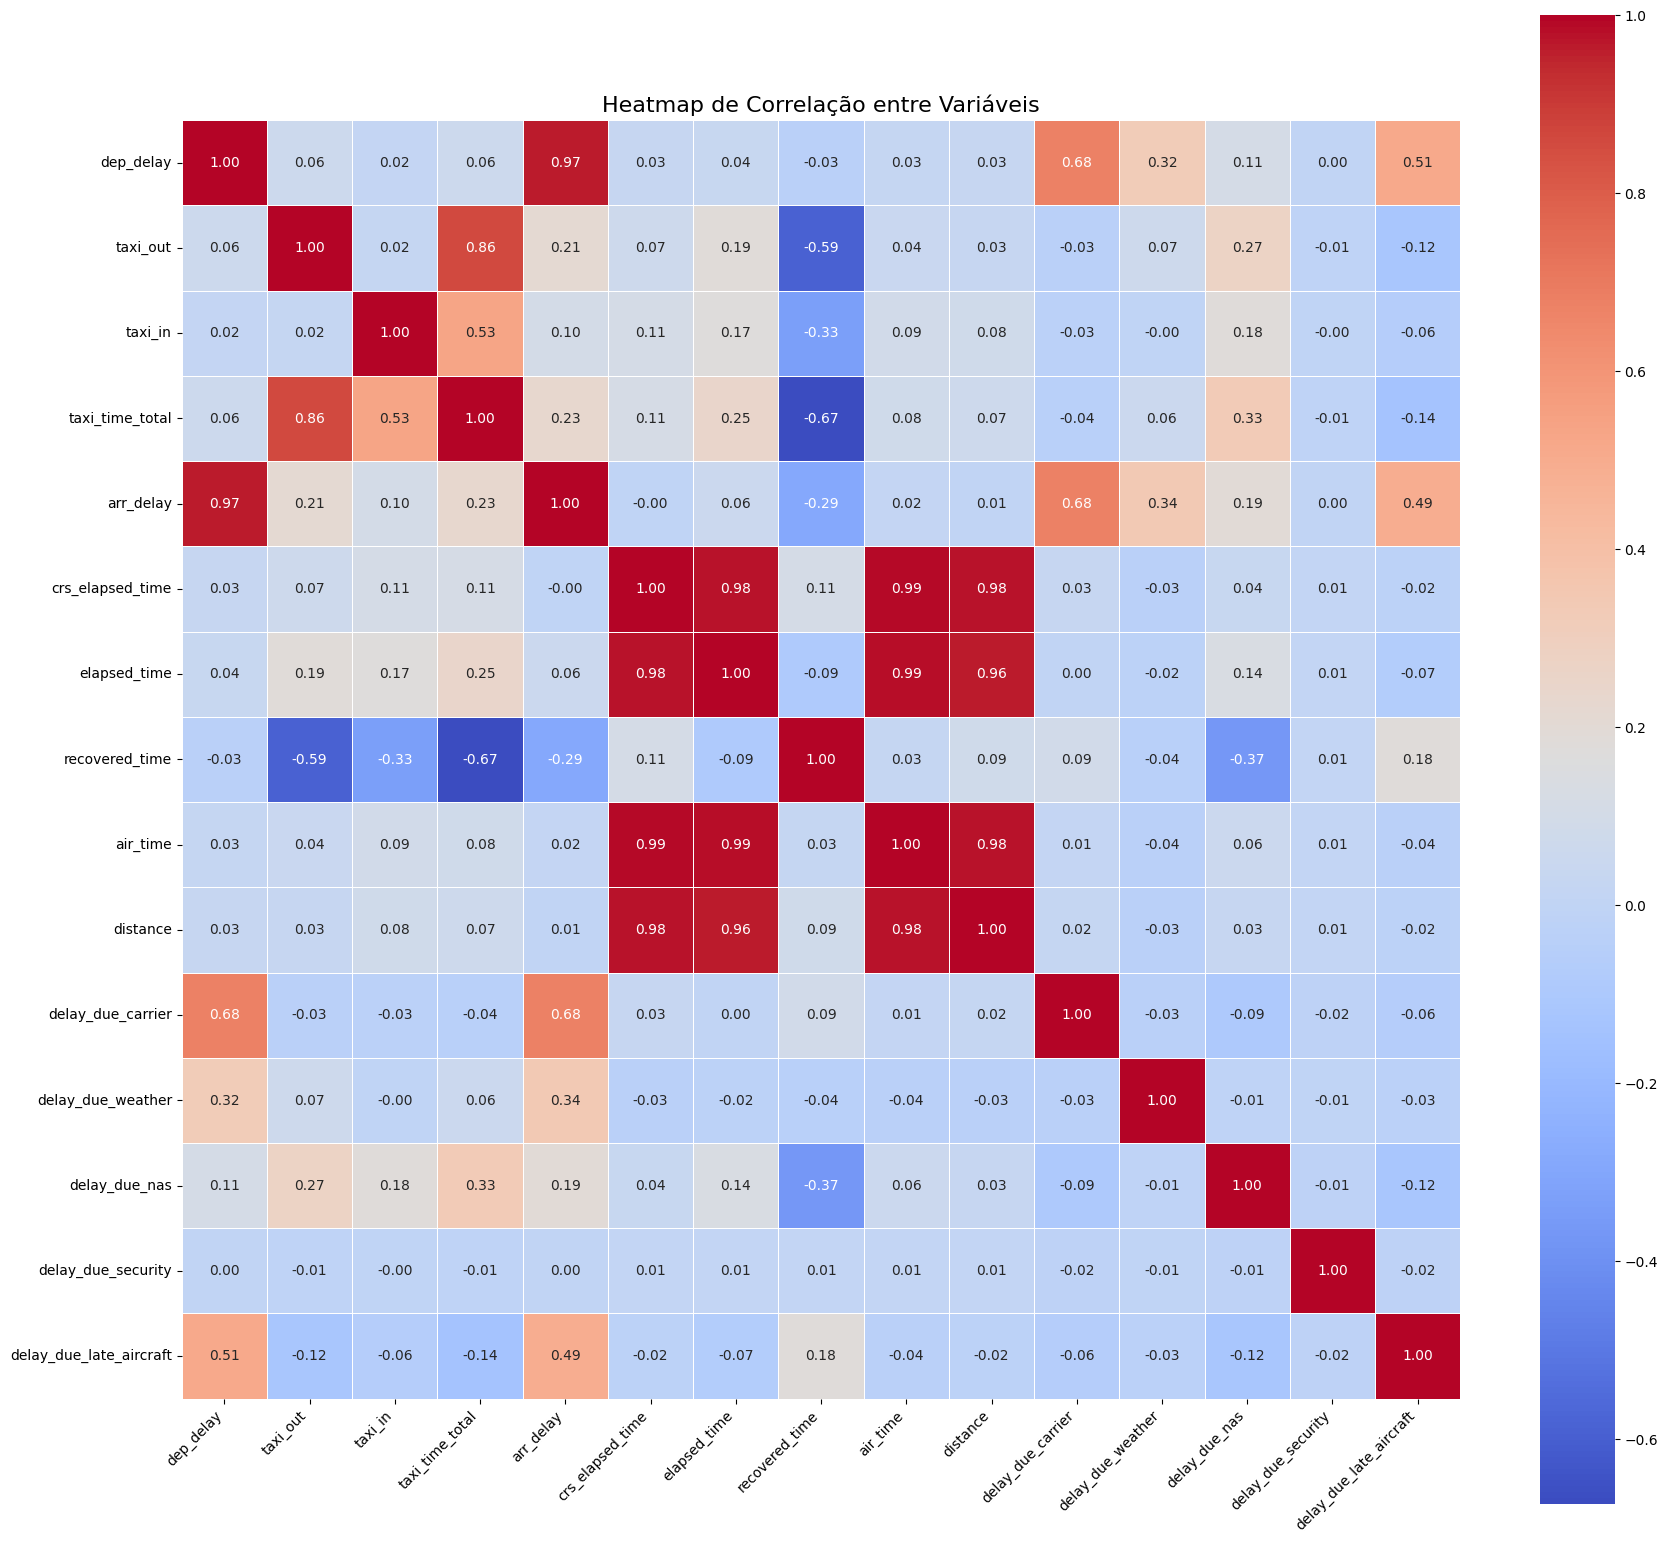

In [299]:
# Colunas com dados numéricos relevantes para análise de correlação - contínuas
selected_columns = [
    'dep_delay', 'taxi_out', 'taxi_in', 'taxi_time_total', 'arr_delay',
    'crs_elapsed_time', 'elapsed_time', 'recovered_time', 'air_time',
    'distance', 'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
    'delay_due_security', 'delay_due_late_aircraft'
]

# DataFrame apenas com essas colunas
df_corr = df[selected_columns]

# Matriz de correlação no DF Criado
corr_matrix = df_corr.corr()

# Plotar o Heatmap
plt.figure(figsize=(18, 16)) # Um bom tamanho para muitas variáveis
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5) # Adicionei linewidths
plt.title('Heatmap de Correlação entre Variáveis', fontsize=16) # Ajustei o título
plt.xticks(rotation=45, ha='right', fontsize=10) # Melhorar legibilidade dos ticks do eixo x
plt.yticks(fontsize=10) # Melhorar legibilidade dos ticks do eixo y
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()


## Análise Univariada e Bivariada

### Análise dos Atrasos na Partida em Minutos

Voos para análise de dep_delay: 116713


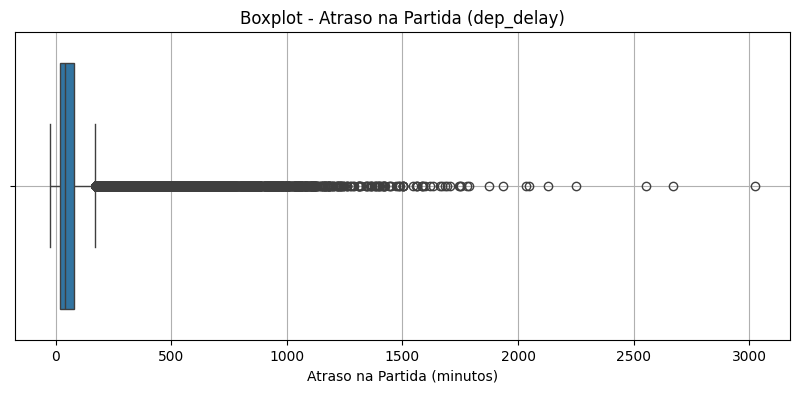


Resumo estatístico simplificado para partida (dep_delay):
Mínimo (Maior Adiantamento): -25 minutos
Máximo (Maior Atraso):      3024 minutos
Média:                     64.00 minutos
Mediana (50%):             39 minutos
Limite inferior: -77.00
Limite superior: 171.00

Resumo estatístico simplificado para partida (dep_delay) sem outliers:
Mínimo (Maior Adiantamento): -25 minutos
Máximo (Maior Atraso):      171 minutos
Média:                     44.73 minutos
Mediana (50%):             35 minutos


In [300]:
# Apenas voos que não foram cancelados ou desviados
df_atrasados = df[(df['delayed'] == 1) & (df['cancelled'] == 0) & (df['diverted'] == 0)].copy()

# Análise de voos com atraso na chegada
print(f"Voos para análise de dep_delay: {len(df_atrasados)}")

    
# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_atrasados['dep_delay'])
plt.title('Boxplot - Atraso na Partida (dep_delay)')
plt.xlabel('Atraso na Partida (minutos)')
plt.grid(True)
plt.show()

# Resumo Estatístico
print("\nResumo estatístico simplificado para partida (dep_delay):")
desc_stats = df_atrasados['dep_delay'].describe()
print(f"Mínimo (Maior Adiantamento): {desc_stats['min']:.0f} minutos")
print(f"Máximo (Maior Atraso):      {desc_stats['max']:.0f} minutos")
print(f"Média:                     {desc_stats['mean']:.2f} minutos")
print(f"Mediana (50%):             {desc_stats['50%']:.0f} minutos") # Mediana é o 50º percentil

# Cálculo dos limites de outlier usando IQR
q1 = df_atrasados['dep_delay'].quantile(0.25)
q3 = df_atrasados['dep_delay'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificação de outliers
df_dep_delay_sem_outlier = df_atrasados[
    (df_atrasados['dep_delay'] >= limite_inferior) & 
    (df_atrasados['dep_delay'] <= limite_superior)
].copy()

# Resumo estatístico sem outliers
desc_stats_sem_outlier = df_dep_delay_sem_outlier['dep_delay'].describe()

print("\nResumo estatístico simplificado para partida (dep_delay) sem outliers:")
print(f"Mínimo (Maior Adiantamento): {desc_stats_sem_outlier['min']:.0f} minutos")
print(f"Máximo (Maior Atraso):      {desc_stats_sem_outlier['max']:.0f} minutos")
print(f"Média:                     {desc_stats_sem_outlier['mean']:.2f} minutos")
print(f"Mediana (50%):             {desc_stats_sem_outlier['50%']:.0f} minutos")


### Análise dos Atrasos na Chegada em Minutos

Voos para análise de arr_delay: 116713


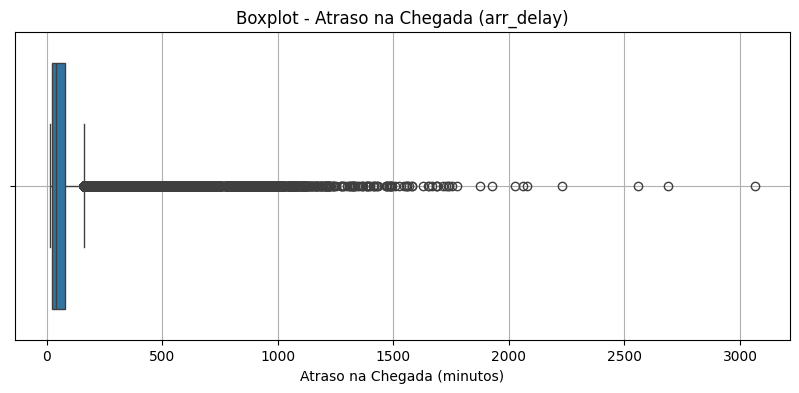


Resumo estatístico simplificado para chegada (arr_delay):
Mínimo (Maior Adiantamento): 15 minutos
Máximo (Maior Atraso):      3063 minutos
Média:                     69.44 minutos
Mediana (50%):             41 minutos
Limite inferior: -58.50
Limite superior: 161.50

Resumo estatístico simplificado para chegada (arr_delay) sem outliers:
Mínimo (Maior Adiantamento): 15 minutos
Máximo (Maior Atraso):      161 minutos
Média:                     49.61 minutos
Mediana (50%):             37 minutos


In [301]:
# Apenas voos que não foram cancelados ou desviados
df_atrasados = df[(df['delayed'] == 1) & (df['cancelled'] == 0) & (df['diverted'] == 0)].copy()

# Análise de voos com atraso na chegada
print(f"Voos para análise de arr_delay: {len(df_atrasados)}")

    
# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_atrasados['arr_delay'])
plt.title('Boxplot - Atraso na Chegada (arr_delay)')
plt.xlabel('Atraso na Chegada (minutos)')
plt.grid(True)
plt.show()

# Resumo Estatístico
print("\nResumo estatístico simplificado para chegada (arr_delay):")
desc_stats = df_atrasados['arr_delay'].describe()
print(f"Mínimo (Maior Adiantamento): {desc_stats['min']:.0f} minutos")
print(f"Máximo (Maior Atraso):      {desc_stats['max']:.0f} minutos")
print(f"Média:                     {desc_stats['mean']:.2f} minutos")
print(f"Mediana (50%):             {desc_stats['50%']:.0f} minutos") # Mediana é o 50º percentil

# Cálculo dos limites de outlier usando IQR
q1 = df_atrasados['arr_delay'].quantile(0.25)
q3 = df_atrasados['arr_delay'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificação de outliers
df_arr_delay_sem_outlier = df_atrasados[
    (df_atrasados['arr_delay'] >= limite_inferior) & 
    (df_atrasados['arr_delay'] <= limite_superior)
].copy()

# Resumo estatístico sem outliers
desc_stats_sem_outlier = df_arr_delay_sem_outlier['arr_delay'].describe()

print("\nResumo estatístico simplificado para chegada (arr_delay) sem outliers:")
print(f"Mínimo (Maior Adiantamento): {desc_stats_sem_outlier['min']:.0f} minutos")
print(f"Máximo (Maior Atraso):      {desc_stats_sem_outlier['max']:.0f} minutos")
print(f"Média:                     {desc_stats_sem_outlier['mean']:.2f} minutos")
print(f"Mediana (50%):             {desc_stats_sem_outlier['50%']:.0f} minutos")


### Taxiamento Antes da Decolagem

Voos para análise de Taxiamento Antes da Decolagem: 527197


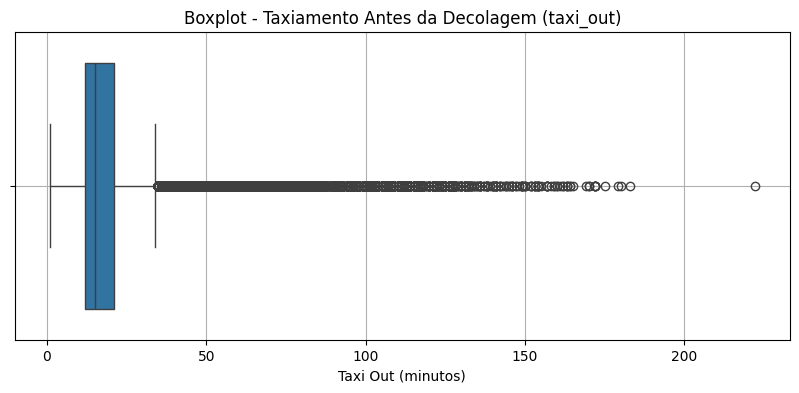


Resumo estatístico simplificado para Taxiamento Antes da Decolagemt:
Mínimo:  1 minutos
Máximo:  222 minutos
Média:   18.33 minutos
Mediana: 15 minutos
Limite inferior: -1.50
Limite superior: 34.50

Resumo estatístico simplificado para Taxiamento Antes da Decolagem - sem outliers:
Mínimo:  1 minutos
Máximo:  34 minutos
Média:   16.21 minutos
Mediana: 15 minutos


In [302]:
# Apenas voos que não foram cancelados ou desviados
df_taxi = df[(df['cancelled'] == 0) & (df['diverted'] == 0)].copy()

# Remove linhas onde taxi_out é nulo
df_taxi.dropna(subset=['taxi_out'], inplace=True)

print(f"Voos para análise de Taxiamento Antes da Decolagem: {len(df_taxi)}")

# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_taxi['taxi_out'])
plt.title('Boxplot - Taxiamento Antes da Decolagem (taxi_out)')
plt.xlabel('Taxi Out (minutos)')
plt.grid(True)
plt.show()

# Resumo Estatístico
print("\nResumo estatístico simplificado para Taxiamento Antes da Decolagemt:")
desc_stats = df_taxi['taxi_out'].describe()
print(f"Mínimo:  {desc_stats['min']:.0f} minutos")
print(f"Máximo:  {desc_stats['max']:.0f} minutos")
print(f"Média:   {desc_stats['mean']:.2f} minutos")
print(f"Mediana: {desc_stats['50%']:.0f} minutos")

# Cálculo dos limites de outlier usando IQR
q1 = df_taxi['taxi_out'].quantile(0.25)
q3 = df_taxi['taxi_out'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificação de outliers
df_taxi_sem_outlier = df_taxi[
    (df_taxi['taxi_out'] >= limite_inferior) & 
    (df_taxi['taxi_out'] <= limite_superior)
].copy()

# Resumo estatístico sem outliers
desc_stats_sem_outlier = df_taxi_sem_outlier['taxi_out'].describe()

print("\nResumo estatístico simplificado para Taxiamento Antes da Decolagem - sem outliers:")
print(f"Mínimo:  {desc_stats_sem_outlier['min']:.0f} minutos")
print(f"Máximo:  {desc_stats_sem_outlier['max']:.0f} minutos")
print(f"Média:   {desc_stats_sem_outlier['mean']:.2f} minutos")
print(f"Mediana: {desc_stats_sem_outlier['50%']:.0f} minutos")


### Tempo Total Programado do Voo

Voos para análise de Tempo Total Programado do Voo: 527197


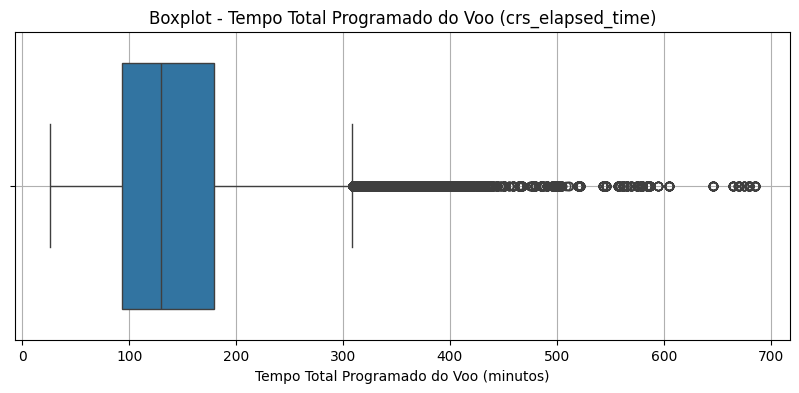


Resumo estatístico simplificado para Tempo Total Programado do Voo:
Mínimo:  26 minutos
Máximo:  685 minutos
Média:   147.24 minutos
Mediana: 130 minutos
Limite inferior: -36.00
Limite superior: 308.00

Resumo estatístico simplificado para Tempo Total Programado do Voo - sem outliers:
Mínimo:  26 minutos
Máximo:  308 minutos
Média:   136.13 minutos
Mediana: 126 minutos


In [303]:
# Apenas voos que não foram cancelados ou desviados
df_elapsed = df[(df['cancelled'] == 0) & (df['diverted'] == 0)].copy()

# Remove linhas onde elapsed_time é nulo
df_elapsed.dropna(subset=['crs_elapsed_time'], inplace=True)

print(f"Voos para análise de Tempo Total Programado do Voo: {len(df_elapsed)}")

# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_elapsed['crs_elapsed_time'])
plt.title('Boxplot - Tempo Total Programado do Voo (crs_elapsed_time)')
plt.xlabel('Tempo Total Programado do Voo (minutos)')
plt.grid(True)
plt.show()

# Resumo Estatístico
print("\nResumo estatístico simplificado para Tempo Total Programado do Voo:")
desc_stats = df_elapsed['crs_elapsed_time'].describe()
print(f"Mínimo:  {desc_stats['min']:.0f} minutos")
print(f"Máximo:  {desc_stats['max']:.0f} minutos")
print(f"Média:   {desc_stats['mean']:.2f} minutos")
print(f"Mediana: {desc_stats['50%']:.0f} minutos")

# Cálculo dos limites de outlier usando IQR
q1 = df_elapsed['crs_elapsed_time'].quantile(0.25)
q3 = df_elapsed['crs_elapsed_time'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificação de outliers
df_elapsed_sem_outlier = df_elapsed[
    (df_elapsed['crs_elapsed_time'] >= limite_inferior) & 
    (df_elapsed['crs_elapsed_time'] <= limite_superior)
].copy()

# Resumo estatístico sem outliers
desc_stats_sem_outlier = df_elapsed_sem_outlier['crs_elapsed_time'].describe()

print("\nResumo estatístico simplificado para Tempo Total Programado do Voo - sem outliers:")
print(f"Mínimo:  {desc_stats_sem_outlier['min']:.0f} minutos")
print(f"Máximo:  {desc_stats_sem_outlier['max']:.0f} minutos")
print(f"Média:   {desc_stats_sem_outlier['mean']:.2f} minutos")
print(f"Mediana: {desc_stats_sem_outlier['50%']:.0f} minutos")


### Tempo Total Real do Voo

Voos para análise de Tempo Total Real do Voo: 527197


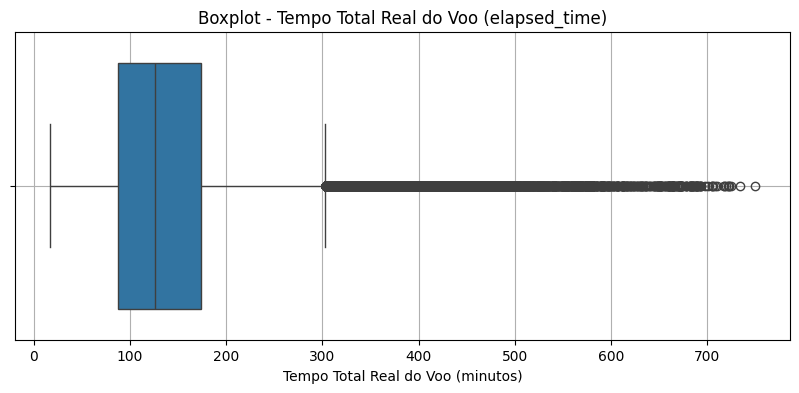


Resumo estatístico simplificado para Tempo Total Real do Voo:
Mínimo:  17 minutos
Máximo:  749 minutos
Média:   142.17 minutos
Mediana: 126 minutos
Limite inferior: -41.00
Limite superior: 303.00

Resumo estatístico simplificado para Tempo Total Real do Voo - sem outliers:
Mínimo:  17 minutos
Máximo:  303 minutos
Média:   131.64 minutos
Mediana: 122 minutos


In [304]:
# Apenas voos que não foram cancelados ou desviados
df_elapsed = df[(df['cancelled'] == 0) & (df['diverted'] == 0)].copy()

# Remove linhas onde elapsed_time é nulo
df_elapsed.dropna(subset=['elapsed_time'], inplace=True)

print(f"Voos para análise de Tempo Total Real do Voo: {len(df_elapsed)}")

# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_elapsed['elapsed_time'])
plt.title('Boxplot - Tempo Total Real do Voo (elapsed_time)')
plt.xlabel('Tempo Total Real do Voo (minutos)')
plt.grid(True)
plt.show()

# Resumo Estatístico
print("\nResumo estatístico simplificado para Tempo Total Real do Voo:")
desc_stats = df_elapsed['elapsed_time'].describe()
print(f"Mínimo:  {desc_stats['min']:.0f} minutos")
print(f"Máximo:  {desc_stats['max']:.0f} minutos")
print(f"Média:   {desc_stats['mean']:.2f} minutos")
print(f"Mediana: {desc_stats['50%']:.0f} minutos")

# Cálculo dos limites de outlier usando IQR
q1 = df_elapsed['elapsed_time'].quantile(0.25)
q3 = df_elapsed['elapsed_time'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificação de outliers
df_elapsed_sem_outlier = df_elapsed[
    (df_elapsed['elapsed_time'] >= limite_inferior) & 
    (df_elapsed['elapsed_time'] <= limite_superior)
].copy()

# Resumo estatístico sem outliers
desc_stats_sem_outlier = df_elapsed_sem_outlier['elapsed_time'].describe()

print("\nResumo estatístico simplificado para Tempo Total Real do Voo - sem outliers:")
print(f"Mínimo:  {desc_stats_sem_outlier['min']:.0f} minutos")
print(f"Máximo:  {desc_stats_sem_outlier['max']:.0f} minutos")
print(f"Média:   {desc_stats_sem_outlier['mean']:.2f} minutos")
print(f"Mediana: {desc_stats_sem_outlier['50%']:.0f} minutos")


### Variação do Tempo Real de Voo em Relação ao Programado

Voos para análise de recovered_time (não cancelados/desviados e com recovered_time válido): 527197


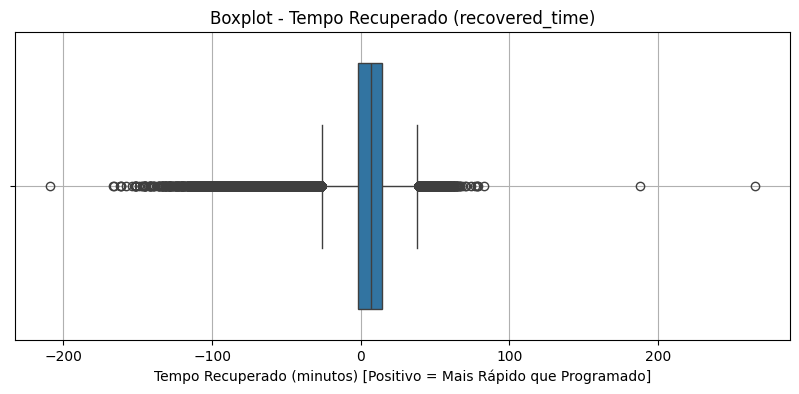

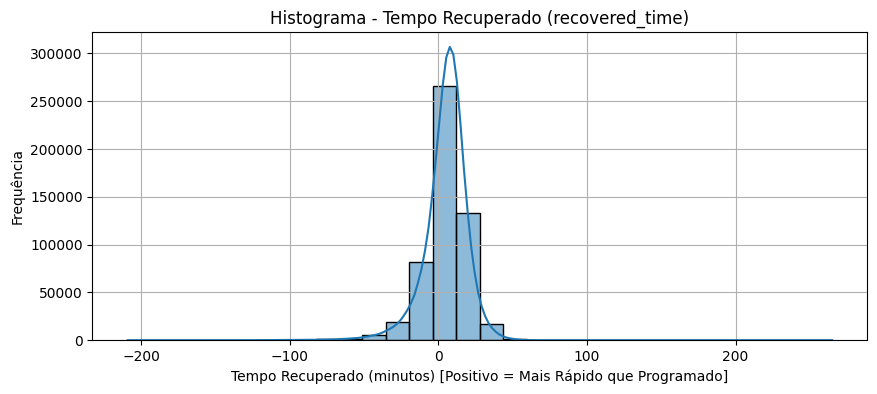


Resumo estatístico simplificado para Tempo Recuperado (recovered_time):
Mínimo:  -209 minutos
Máximo:  265 minutos
Média:   5.07 minutos
Mediana: 7 minutos
Limite inferior: -26.00
Limite superior: 38.00

Resumo estatístico simplificado para Tempo Recuperado (recovered_time) - sem outliers:
Mínimo:  -26 minutos
Máximo:  38 minutos
Média:   6.33 minutos
Mediana: 7 minutos


In [305]:
# Filtrar primeiro por voos operados
df_operados = df[(df['cancelled'] == 0) & (df['diverted'] == 0)].copy()

# Remove linhas onde recovered_time é nulo DENTRO DE df_operados
df_operados.dropna(subset=['recovered_time'], inplace=True) # <--- CORREÇÃO AQUI

print(f"Voos para análise de recovered_time (não cancelados/desviados e com recovered_time válido): {len(df_operados)}") # <--- CORREÇÃO AQUI

# Boxplot de recovered_time
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_operados['recovered_time']) # <--- CORREÇÃO AQUI
plt.title('Boxplot - Tempo Recuperado (recovered_time)')
plt.xlabel('Tempo Recuperado (minutos) [Positivo = Mais Rápido que Programado]') # Ajuste no label para clareza
plt.grid(True)
plt.show()

# Histograma de recovered_time
plt.figure(figsize=(10, 4))
sns.histplot(df_operados['recovered_time'], bins=30, kde=True) # <--- CORREÇÃO AQUI
plt.title('Histograma - Tempo Recuperado (recovered_time)')
plt.xlabel('Tempo Recuperado (minutos) [Positivo = Mais Rápido que Programado]') # Ajuste no label
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Resumo Estatístico
print("\nResumo estatístico simplificado para Tempo Recuperado (recovered_time):")
desc_stats = df_operados['recovered_time'].describe() # <--- CORREÇÃO AQUI
print(f"Mínimo:  {desc_stats['min']:.0f} minutos")
print(f"Máximo:  {desc_stats['max']:.0f} minutos")
print(f"Média:   {desc_stats['mean']:.2f} minutos")
print(f"Mediana: {desc_stats['50%']:.0f} minutos")

# Cálculo dos limites de outlier usando IQR
q1 = df_operados['recovered_time'].quantile(0.25) # <--- CORREÇÃO AQUI
q3 = df_operados['recovered_time'].quantile(0.75) # <--- CORREÇÃO AQUI
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificação de outliers
df_recovered_time_sem_outlier = df_operados[ # <--- CORREÇÃO AQUI
    (df_operados['recovered_time'] >= limite_inferior) &
    (df_operados['recovered_time'] <= limite_superior)
].copy()

# Resumo estatístico sem outliers
desc_stats_sem_outlier = df_recovered_time_sem_outlier['recovered_time'].describe() # Não precisa de correção aqui, pois já usa o df correto
print("\nResumo estatístico simplificado para Tempo Recuperado (recovered_time) - sem outliers:")
print(f"Mínimo:  {desc_stats_sem_outlier['min']:.0f} minutos")
print(f"Máximo:  {desc_stats_sem_outlier['max']:.0f} minutos")
print(f"Média:   {desc_stats_sem_outlier['mean']:.2f} minutos")
print(f"Mediana: {desc_stats_sem_outlier['50%']:.0f} minutos")

### Tempo no Ar

Voos para análise de Tempo no Ar: 527197


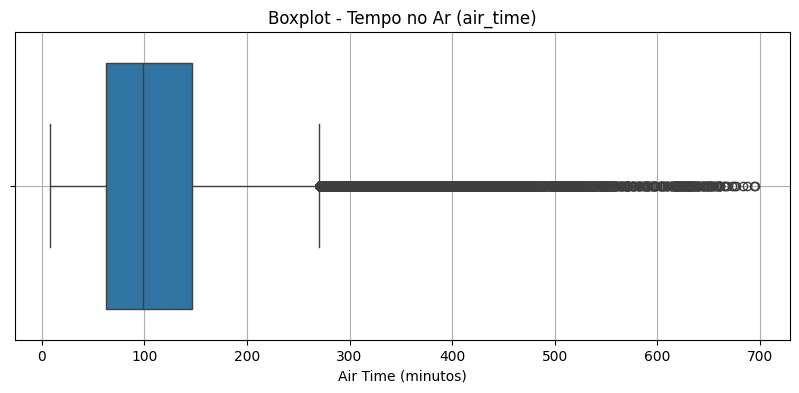


Resumo estatístico simplificado para Tempo no Ar:
Mínimo:  8 minutos
Máximo:  695 minutos
Média:   115.81 minutos
Mediana: 99 minutos
Limite inferior: -61.50
Limite superior: 270.50

Resumo estatístico simplificado para Tempo no Ar - sem outliers:
Mínimo:  8 minutos
Máximo:  270 minutos
Média:   104.92 minutos
Mediana: 95 minutos


In [306]:
# Apenas voos que não foram cancelados ou desviados
df_airtime = df[(df['cancelled'] == 0) & (df['diverted'] == 0)].copy()

# Remove linhas onde air_time é nulo
df_airtime.dropna(subset=['air_time'], inplace=True)

print(f"Voos para análise de Tempo no Ar: {len(df_airtime)}")

# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_airtime['air_time'])
plt.title('Boxplot - Tempo no Ar (air_time)')
plt.xlabel('Air Time (minutos)')
plt.grid(True)
plt.show()

# Resumo Estatístico
print("\nResumo estatístico simplificado para Tempo no Ar:")
desc_stats = df_airtime['air_time'].describe()
print(f"Mínimo:  {desc_stats['min']:.0f} minutos")
print(f"Máximo:  {desc_stats['max']:.0f} minutos")
print(f"Média:   {desc_stats['mean']:.2f} minutos")
print(f"Mediana: {desc_stats['50%']:.0f} minutos")

# Cálculo dos limites de outlier usando IQR
q1 = df_airtime['air_time'].quantile(0.25)
q3 = df_airtime['air_time'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificação de outliers
df_airtime_sem_outlier = df_airtime[
    (df_airtime['air_time'] >= limite_inferior) & 
    (df_airtime['air_time'] <= limite_superior)
].copy()

# Resumo estatístico sem outliers
desc_stats_sem_outlier = df_airtime_sem_outlier['air_time'].describe()

print("\nResumo estatístico simplificado para Tempo no Ar - sem outliers:")
print(f"Mínimo:  {desc_stats_sem_outlier['min']:.0f} minutos")
print(f"Máximo:  {desc_stats_sem_outlier['max']:.0f} minutos")
print(f"Média:   {desc_stats_sem_outlier['mean']:.2f} minutos")
print(f"Mediana: {desc_stats_sem_outlier['50%']:.0f} minutos")


### Taxiamento Após Pouso

Voos para análise de Taxiamento Após Pouso: 527197


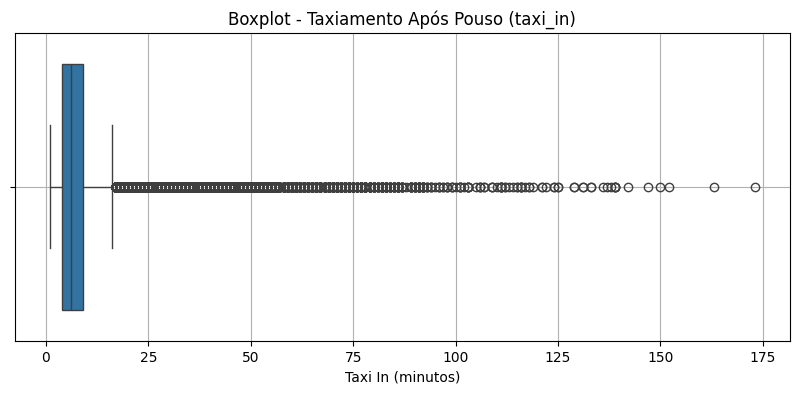


Resumo estatístico simplificado para Taxiamento Após Pouso:
Mínimo:  1 minutos
Máximo:  173 minutos
Média:   8.03 minutos
Mediana: 6 minutos
Limite inferior: -3.50
Limite superior: 16.50

Resumo estatístico simplificado para Taxiamento Após Pouso - sem outliers:
Mínimo:  1 minutos
Máximo:  16 minutos
Média:   6.73 minutos
Mediana: 6 minutos


In [307]:
# Apenas voos que não foram cancelados ou desviados
df_taxi_in = df[(df['cancelled'] == 0) & (df['diverted'] == 0)].copy()

# Remove linhas onde taxi_in é nulo
df_taxi_in.dropna(subset=['taxi_in'], inplace=True)

print(f"Voos para análise de Taxiamento Após Pouso: {len(df_taxi_in)}")

# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_taxi_in['taxi_in'])
plt.title('Boxplot - Taxiamento Após Pouso (taxi_in)')
plt.xlabel('Taxi In (minutos)')
plt.grid(True)
plt.show()

# Resumo Estatístico
print("\nResumo estatístico simplificado para Taxiamento Após Pouso:")
desc_stats = df_taxi_in['taxi_in'].describe()
print(f"Mínimo:  {desc_stats['min']:.0f} minutos")
print(f"Máximo:  {desc_stats['max']:.0f} minutos")
print(f"Média:   {desc_stats['mean']:.2f} minutos")
print(f"Mediana: {desc_stats['50%']:.0f} minutos")

# Cálculo dos limites de outlier usando IQR
q1 = df_taxi_in['taxi_in'].quantile(0.25)
q3 = df_taxi_in['taxi_in'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificação de outliers
df_taxi_in_sem_outlier = df_taxi_in[
    (df_taxi_in['taxi_in'] >= limite_inferior) & 
    (df_taxi_in['taxi_in'] <= limite_superior)
].copy()

# Resumo estatístico sem outliers
desc_stats_sem_outlier = df_taxi_in_sem_outlier['taxi_in'].describe()

print("\nResumo estatístico simplificado para Taxiamento Após Pouso - sem outliers:")
print(f"Mínimo:  {desc_stats_sem_outlier['min']:.0f} minutos")
print(f"Máximo:  {desc_stats_sem_outlier['max']:.0f} minutos")
print(f"Média:   {desc_stats_sem_outlier['mean']:.2f} minutos")
print(f"Mediana: {desc_stats_sem_outlier['50%']:.0f} minutos")


### Hora de Partida Programada

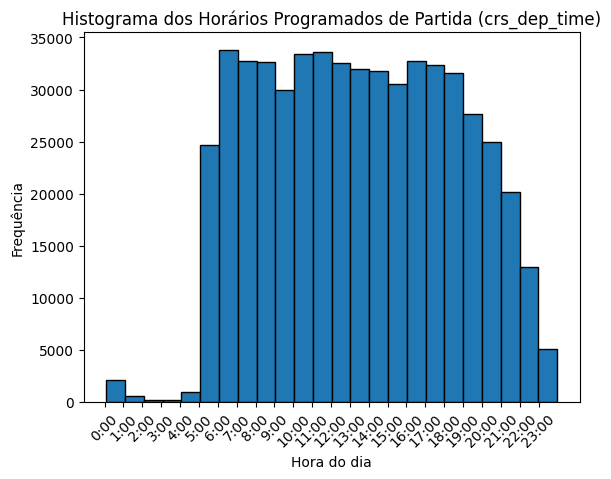

In [308]:
# Converter crs_dep_time para minutos desde meia-noite
df['crs_dep_time_minutes'] = pd.to_datetime(df['crs_dep_time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df['crs_dep_time'], format='%H:%M:%S').dt.minute


# Plotar histograma 
plt.hist(df['crs_dep_time_minutes'], bins=24, edgecolor='black')
plt.xlabel('Hora do dia')
plt.ylabel('Frequência')
plt.title('Histograma dos Horários Programados de Partida (crs_dep_time)')
plt.xticks(ticks=[i*60 for i in range(24)], labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.show()


### Hora Real de Partida

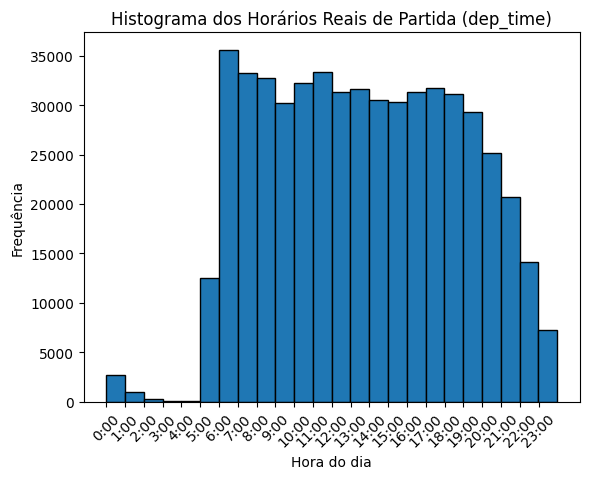

In [309]:
# Converter crs_dep_time para minutos desde meia-noite
df['dep_time_minutes'] = pd.to_datetime(df['dep_time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df['crs_dep_time'], format='%H:%M:%S').dt.minute

# Plotar histograma
plt.hist(df['dep_time_minutes'], bins=24, edgecolor='black')
plt.xlabel('Hora do dia')
plt.ylabel('Frequência')
plt.title('Histograma dos Horários Reais de Partida (dep_time)')
plt.xticks(ticks=[i*60 for i in range(24)], labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.show()

### Distribuição dos Voos por Período (Madrugada, Manhã, Tarde, Noite)

In [310]:
def classificar_periodo(hora):
    if 0 <= hora <= 5:
        return 'Madrugada'
    elif 6 <= hora <= 11:
        return 'Manhã'
    elif 12 <= hora <= 17:
        return 'Tarde'
    else:
        return 'Noite'

df['hora'] = pd.to_datetime(df['crs_dep_time'], format='%H:%M:%S').dt.hour
df['periodo'] = df['hora'].apply(classificar_periodo)

distribuicao_periodo = df.groupby('periodo').size().reset_index(name='total_voos').sort_values(by='total_voos', ascending=False)
print(distribuicao_periodo)

     periodo  total_voos
1      Manhã      206950
3      Tarde      192012
2      Noite      124856
0  Madrugada       15019


### Picos de Operação por Hora

In [311]:
distribuicao_hora = df.groupby('hora').size().reset_index(name='total_voos').sort_values(by='total_voos')
print(distribuicao_hora)


    hora  total_voos
4      4          48
3      3         112
2      2         122
1      1         528
0      0        2013
23    23        5018
5      5       12196
22    22       12933
21    21       20183
20    20       24912
19    19       29698
15    15       30539
9      9       30614
14    14       31619
18    18       32112
16    16       32142
12    12       32342
13    13       32616
17    17       32754
10    10       33394
8      8       33929
11    11       34860
7      7       36215
6      6       37938


### Empresas com Mais volume de Voos

In [312]:
# Empresas com Maior Número de Voos
top_airlines = df['airline_description'].value_counts().head(10)
print(f"Empresas com Maior Número de Voos: {top_airlines}")


Empresas com Maior Número de Voos: airline_description
Southwest Airlines Co.    112430
Delta Air Lines Inc.       75174
American Airlines Inc.     74999
United Air Lines Inc.      56657
SkyWest Airlines Inc.      50347
Republic Airline           24476
JetBlue Airways            23249
Spirit Air Lines           21876
Alaska Airlines Inc.       19801
Envoy Air                  18849
Name: count, dtype: int64


### Atrasos por Horário

In [313]:

df_delayed = df[df['delayed'] == 1].copy() # Usando 'delayed' baseado em arr_delay >= 15

# Calcular o atraso médio de PARTIDA (dep_delay) para esses voos atrasados, por hora de partida programada
df['hora'] = pd.to_datetime(df['crs_dep_time'], format='%H:%M:%S').dt.hour
avg_time_delayed = df_delayed.groupby('hora')['dep_delay'].mean().reset_index(name='avg_dep_delay')
top_avg_time_delayed = avg_time_delayed.sort_values(by='avg_dep_delay', ascending=False).head(10)

print("--- Top 10 Horas com Maior ATRASO MÉDIO de Partida (para voos com atraso na chegada >= 15 min) ---")
print(top_avg_time_delayed)
print("\n")


# --- 2. Top 10 Horas com MAIOR QUANTIDADE de Atrasos na Partida ---
# Contar voos onde dep_delay >= 15 (ou use sua flag 'delayed' se ela for baseada em dep_delay)
# Vamos criar uma flag específica para atraso na partida para esta análise, se ainda não existir
if 'dep_delayed_flag' not in df.columns:
    df['dep_delayed_flag'] = (df['dep_delay'] >= 15).astype(int)

# Contar a quantidade de voos com atraso na partida por hora de partida programada
count_delayed_hour = df[df['dep_delayed_flag'] == 1].groupby('hora').size().reset_index(name='delay_count')
top_count_delayed_hour = count_delayed_hour.sort_values(by='delay_count', ascending=False).head(10)

print("--- Top 10 Horas com Maior QUANTIDADE de Atrasos na Partida (Partida Atrasada >= 15 min) ---")
print(top_count_delayed_hour)


--- Top 10 Horas com Maior ATRASO MÉDIO de Partida (para voos com atraso na chegada >= 15 min) ---
    hora  avg_dep_delay
5      5      85.062386
6      6      78.974636
0      0      77.382353
23    23      74.658495
22    22      69.853409
21    21      65.752850
7      7      65.269759
19    19      65.149270
18    18      65.130610
4      4      65.100000


--- Top 10 Horas com Maior QUANTIDADE de Atrasos na Partida (Partida Atrasada >= 15 min) ---
    hora  delay_count
19    19         8518
18    18         8392
17    17         8345
16    16         8182
14    14         7574
13    13         7357
15    15         7337
20    20         7059
11    11         6638
12    12         6568


### Atraso Médio e Taxa de Atraso por Hora Programada de Partida

In [314]:
# Agrupar atraso médio por hora de partida programada
delay_by_hour = df.groupby('scheduled_dep_period')['dep_delay'].mean().reset_index()
delay_by_hour.rename(columns={'dep_delay': 'avg_dep_delay'}, inplace=True)

# Taxa de voos atrasados por hora (considerando a coluna 'delayed' que já está no seu banco)
delay_rate_by_hour = df.groupby('scheduled_dep_period')['delayed'].mean().reset_index()
delay_rate_by_hour['delay_rate_percent'] = delay_rate_by_hour['delayed'] * 100
delay_rate_by_hour.drop(columns='delayed', inplace=True)

print(delay_by_hour)
print(delay_rate_by_hour)


  scheduled_dep_period  avg_dep_delay
0            Afternoon      14.263950
1              Morning       9.303310
2                Night      17.250478
3              Red-Eye      14.651940
  scheduled_dep_period  delay_rate_percent
0            Afternoon           23.754245
1              Morning           16.982286
2                Night           26.628276
3              Red-Eye           22.635494


### Analisar Atraso por Rota

In [315]:
# Atraso médio por rota
route_delay = df.groupby('route_id')['arr_delay'].mean().reset_index()
route_delay = route_delay.sort_values(by='arr_delay', ascending=False)

print(route_delay.head(10))  # Top 10 rotas com maior atraso médio

# Motivos de atraso por rota
route_delay_reasons = df[df['delayed'] == 1].groupby('route_id')['main_delay_cause'].value_counts().reset_index(name='count')
route_delay_reasons = route_delay_reasons.sort_values(by='count', ascending=False)

print(route_delay_reasons.head(10))  # Top 10 rotas com mais cancelamentos e seus motivos



        route_id    arr_delay
665   BOS to VPS  1525.000000
5544  VPS to BOS  1496.000000
3638  MTJ to LGA  1181.000000
680   BTR to IAH   431.666667
342   AUS to TYS   384.000000
3770  ONT to MCO   370.666667
2396  IAH to BTR   358.750000
83    ANC to DFW   329.500000
2023  FLL to PIE   321.000000
2993  LGA to MTJ   319.000000
         route_id          main_delay_cause  count
11041  ORD to LGA  National Aviation System    142
7869   LAS to LAX             Late Aircraft    128
1737   BOS to LGA  National Aviation System    126
9104   MCO to SJU                   Carrier    120
13916  SFO to LAX             Late Aircraft    120
8170   LAX to LAS             Late Aircraft    118
7791   LAS to DEN             Late Aircraft    116
8263   LAX to SFO  National Aviation System    108
10544  OGG to HNL             Late Aircraft    101
4219   DEN to SLC                   Carrier     94


### Analisar Cancelamento por Rota

In [316]:
# Cancelamentos por rota
route_cancellations = df[df['cancelled'] == 1].groupby('route_id').size().reset_index(name='cancellations')
route_cancellations = route_cancellations.sort_values(by='cancellations', ascending=False)

print(route_cancellations.head(10))  # Top 10 rotas com mais cancelamentos

# Motivos de cancelamento por rota
route_cancel_reasons = df[df['cancelled'] == 1].groupby('route_id')['cancellation_cause'].value_counts().reset_index(name='count')
route_cancel_reasons = route_cancel_reasons.sort_values(by='count', ascending=False)

print(route_cancel_reasons.head(10))  # Top 10 rotas com mais cancelamentos e seus motivos

        route_id  cancellations
763   DEN to ASE             42
54    ASE to DEN             41
322   BOS to LGA             28
857   DEN to PHX             28
1590  LAS to DEN             27
57    ASE to LAX             27
826   DEN to LAS             26
1701  LGA to BOS             25
790   DEN to DAL             24
984   DFW to LGA             23
        route_id cancellation_cause  count
1140  DEN to ASE            Weather     41
69    ASE to DEN            Weather     36
73    ASE to LAX            Weather     26
1179  DEN to DAL            Weather     24
1260  DEN to MSP            Weather     23
1278  DEN to PHX            Weather     22
956   DAL to DEN            Weather     21
3068  MSP to DEN            Weather     21
3577  PHX to DEN            Weather     21
1146  DEN to AUS            Weather     20


### Analisar Atraso por Companhia Aérea

In [317]:
# Atraso médio por companhia
airline_delay = df.groupby(['airline_code', 'airline_description'])['arr_delay'].mean().reset_index()
airline_delay = airline_delay.sort_values(by='arr_delay', ascending=False)

print(airline_delay)


   airline_code     airline_description  arr_delay
5            F9  Frontier Airlines Inc.  21.108980
6            G4           Allegiant Air  15.802548
9            NK        Spirit Air Lines  13.895166
11           OO   SkyWest Airlines Inc.  11.114660
1            AA  American Airlines Inc.  10.787078
3            B6         JetBlue Airways  10.552137
7            HA  Hawaiian Airlines Inc.   9.131046
12           UA   United Air Lines Inc.   8.315693
8            MQ               Envoy Air   7.322892
0            9E       Endeavor Air Inc.   7.204544
4            DL    Delta Air Lines Inc.   6.402558
13           WN  Southwest Airlines Co.   4.911660
2            AS    Alaska Airlines Inc.   3.266104
10           OH       PSA Airlines Inc.   0.561161
14           YX        Republic Airline  -1.621689


### Analisar os Motivos dos Atrasos

In [318]:
# Soma dos minutos de atraso por causa
delay_causes = df[['delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
                    'delay_due_security', 'delay_due_late_aircraft']].sum().reset_index()

delay_causes.columns = ['cause', 'total_minutes']

delay_causes = delay_causes.sort_values(by='total_minutes', ascending=False)

print(delay_causes)


                     cause  total_minutes
4  delay_due_late_aircraft      3006030.0
0        delay_due_carrier      2860559.0
2            delay_due_nas      1709669.0
1        delay_due_weather       511666.0
3       delay_due_security        17069.0


### Hora da Decolagem

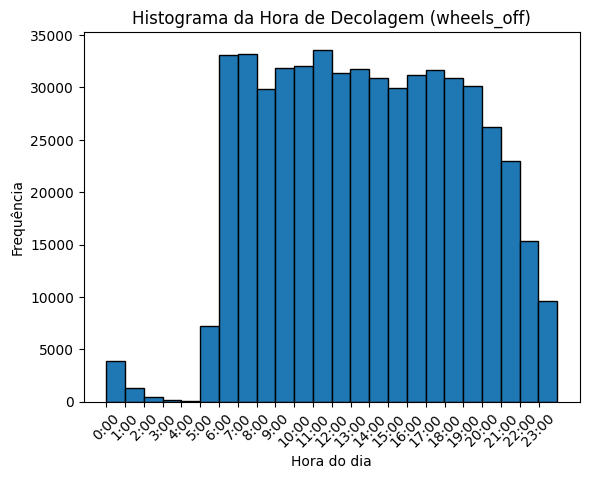

In [319]:
# Converter crs_dep_time para minutos desde meia-noite
df['wheels_off_minutes'] = pd.to_datetime(df['wheels_off'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df['wheels_off'], format='%H:%M:%S').dt.minute


# Plotar histograma 
plt.hist(df['wheels_off_minutes'], bins=24, edgecolor='black')
plt.xlabel('Hora do dia')
plt.ylabel('Frequência')
plt.title('Histograma da Hora de Decolagem (wheels_off)')
plt.xticks(ticks=[i*60 for i in range(24)], labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.show()

### Hora do Pouso

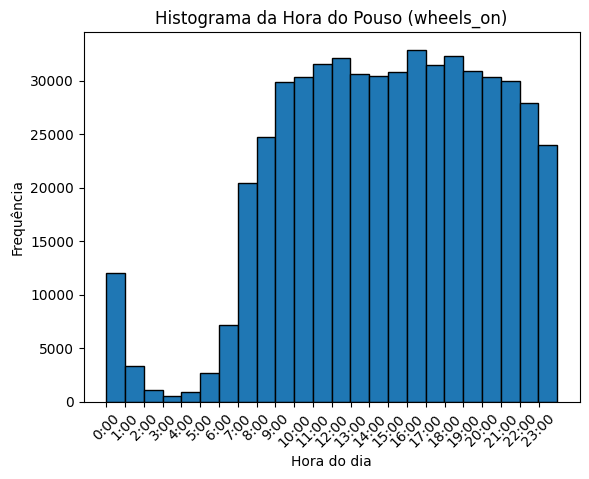

In [320]:
# Converter crs_dep_time para minutos desde meia-noite
df['wheels_on_minutes'] = pd.to_datetime(df['wheels_on'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df['wheels_on'], format='%H:%M:%S').dt.minute


# Plotar histograma 
plt.hist(df['wheels_on_minutes'], bins=24, edgecolor='black')
plt.xlabel('Hora do dia')
plt.ylabel('Frequência')
plt.title('Histograma da Hora do Pouso (wheels_on)')
plt.xticks(ticks=[i*60 for i in range(24)], labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.show()

# Perguntas de Negócios

### Operacional: Quais rotas (origem-destino) apresentam maior frequência e magnitude de atrasos e cancelamentos? Foco: Identificação de gargalos críticos na malha aérea.

#### Frequencia de Atrasos por Rota

As rotas com maior frequência de atraso são:
        route_id  delay_count
2632  LAS to LAX          295
3693  ORD to LGA          289
2768  LAX to SFO          283
2734  LAX to LAS          246
4733  SFO to LAX          219
1314  DEN to LAS          213
3044  MCO to SJU          208
1349  DEN to PHX          204
4866  SLC to DEN          193
1376  DEN to SLC          192


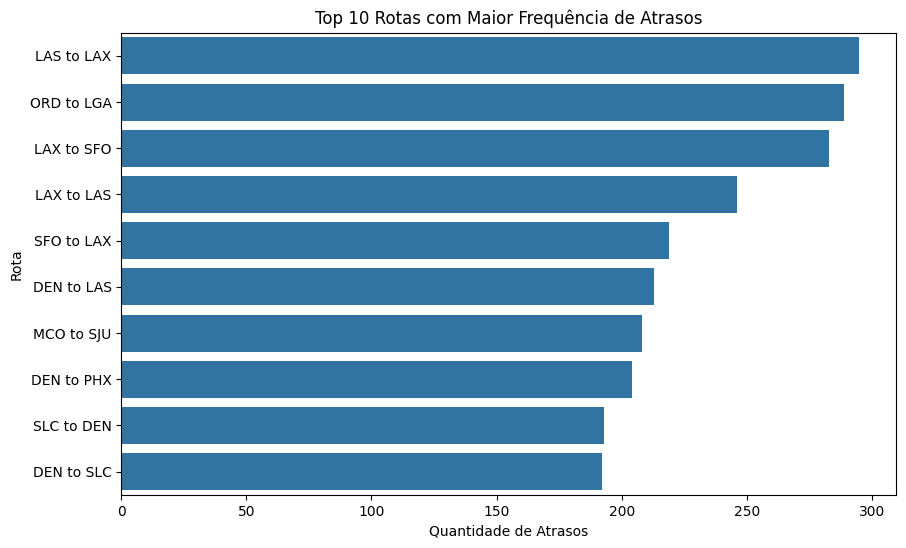

In [321]:
# Frequencia de Atrasos por Rota
# Atraso na Chegada ≥ 15 min
route_delay_freq = df[df['delayed'] == 1].groupby('route_id').size().reset_index(name='delay_count')
route_delay_freq = route_delay_freq.sort_values(by='delay_count', ascending=False)

print('As rotas com maior frequência de atraso são:')
print(route_delay_freq.head(10))  # Top 10 rotas com mais atrasos

plt.figure(figsize=(10,6))
sns.barplot(x='delay_count', y='route_id', data=route_delay_freq.head(10))
plt.title('Top 10 Rotas com Maior Frequência de Atrasos')
plt.xlabel('Quantidade de Atrasos')
plt.ylabel('Rota')
plt.show()

#### Atraso Médio por Rota

As rotas com maior maior tempo médio de atraso são:
        route_id  arr_delay
617   BOS to VPS     1525.0
5289  VPS to BOS     1496.0
3477  MTJ to LGA     1181.0
4659  SFB to GFK      928.0
2429  ITO to LAX      878.0
5313  XNA to MSP      874.0
2305  IAH to HSV      823.0
5147  SYR to PIE      724.0
74    ANC to DFW      649.0
2564  KOA to PHX      572.5


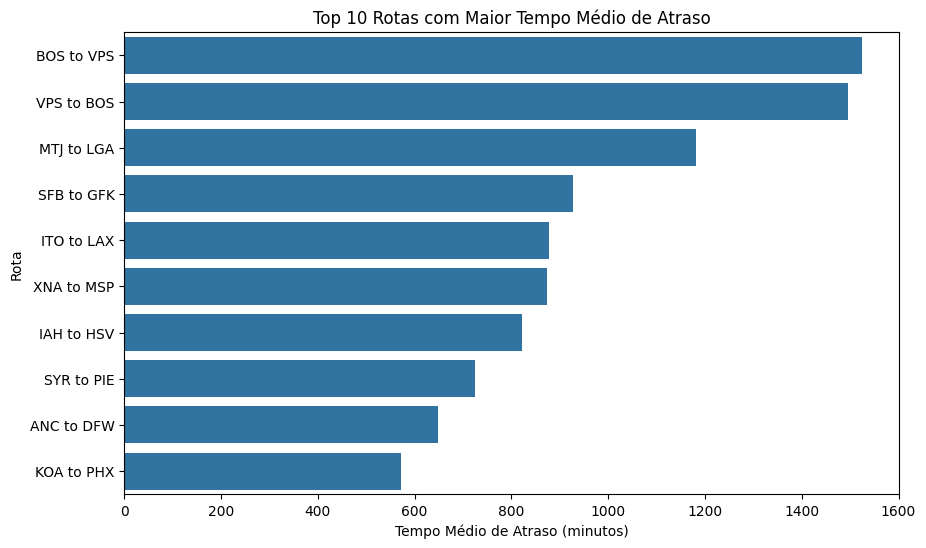

In [322]:
# Atraso médio por rota
route_delay_avg = df[df['delayed'] == 1].groupby('route_id')['arr_delay'].mean().reset_index()
route_delay_avg = route_delay_avg.sort_values(by='arr_delay', ascending=False)

print('As rotas com maior maior tempo médio de atraso são:')
print(route_delay_avg.head(10))  # Top 10 rotas com maior atraso médio

plt.figure(figsize=(10,6))
sns.barplot(x='arr_delay', y='route_id', data=route_delay_avg.head(10))
plt.title('Top 10 Rotas com Maior Tempo Médio de Atraso')
plt.xlabel('Tempo Médio de Atraso (minutos)')
plt.ylabel('Rota')
plt.show()


#### Cancelamentos por Rota

As rotas com mais cancelamentos são:
        route_id  cancellations
763   DEN to ASE             42
54    ASE to DEN             41
322   BOS to LGA             28
857   DEN to PHX             28
1590  LAS to DEN             27
57    ASE to LAX             27
826   DEN to LAS             26
1701  LGA to BOS             25
790   DEN to DAL             24
984   DFW to LGA             23


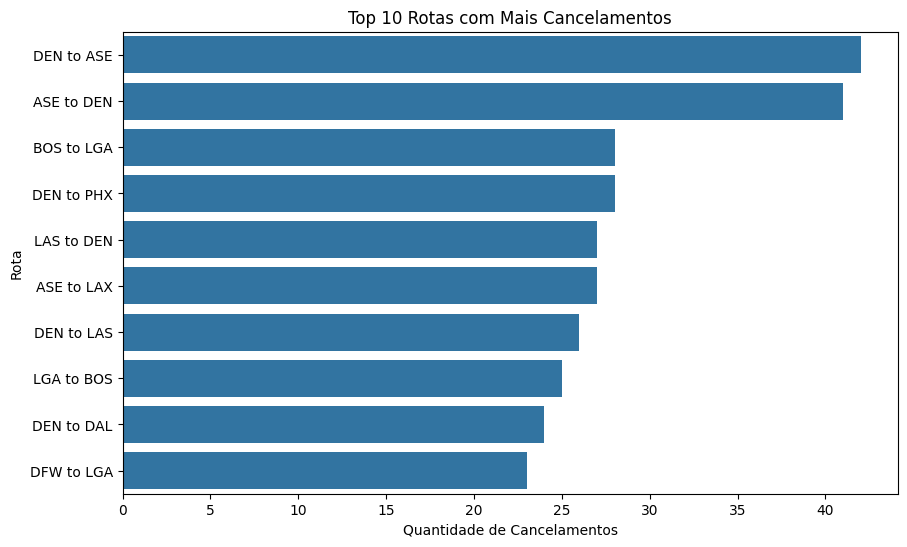

In [323]:
# Cancelamentos por rota
route_cancellations = df[df['cancelled'] == 1].groupby('route_id').size().reset_index(name='cancellations')
route_cancellations = route_cancellations.sort_values(by='cancellations', ascending=False)

print('As rotas com mais cancelamentos são:')
print(route_cancellations.head(10))  # Top 10 rotas com mais cancelamentos

plt.figure(figsize=(10,6))
sns.barplot(x='cancellations', y='route_id', data=route_cancellations.head(10))
plt.title('Top 10 Rotas com Mais Cancelamentos')
plt.xlabel('Quantidade de Cancelamentos')
plt.ylabel('Rota')
plt.show()

### Quais são os principais motivos dos atrasos e cancelamentos registrados, <br> e como esses motivos se distribuem pelas rotas e companhias aéreas mais problemáticas?

#### Principais Motivos de Atraso

Quatidade de Voos por Motivos de Atraso:
           main_delay_cause  causes
1             Late Aircraft   41061
0                   Carrier   38485
2  National Aviation System   32400
4                   Weather    4401
3                  Security     366


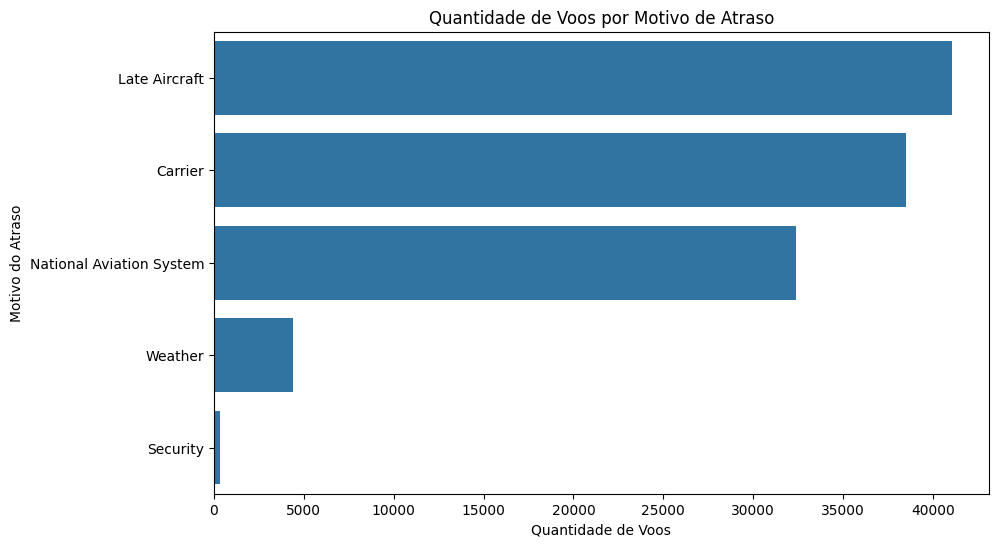

In [324]:
# Contar quantos voos atrasados por motivos
flights_delay_causes = df[df['delayed'] == 1].groupby('main_delay_cause').size().reset_index(name='causes')
flights_delay_causes = flights_delay_causes.sort_values(by='causes', ascending=False)

print("Quatidade de Voos por Motivos de Atraso:")
print(flights_delay_causes)


plt.figure(figsize=(10,6))
sns.barplot(x='causes', y='main_delay_cause', data=flights_delay_causes) 
plt.title('Quantidade de Voos por Motivo de Atraso')
plt.xlabel('Quantidade de Voos')
plt.ylabel('Motivo do Atraso')
plt.show()

#### Principais Motivos de Cancelamento

Quaatidade de Voos por Motivos de Cancelamento:
         cancellation_cause  causes
3                   Weather    6611
1  National Aviation System    1792
0                   Carrier    1707
2                  Security     185


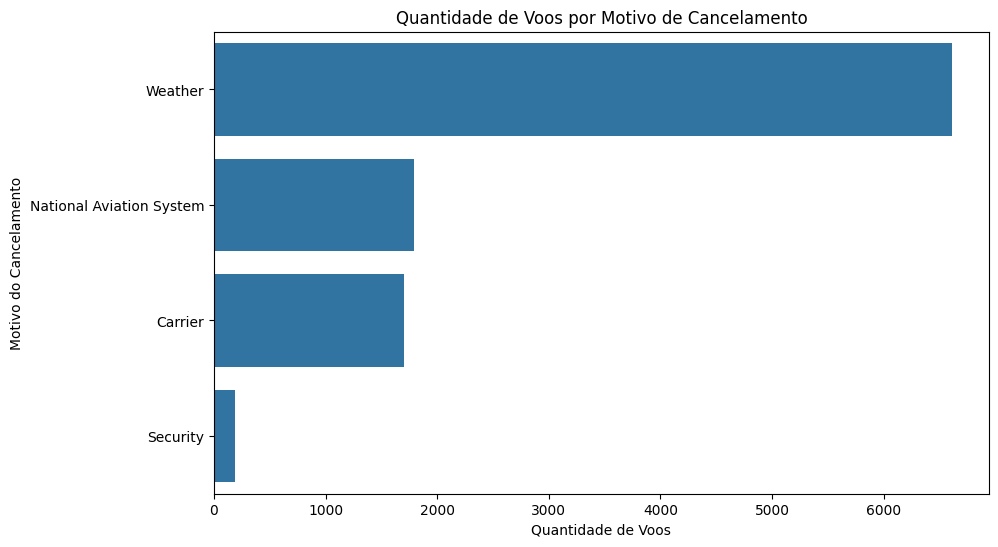

In [325]:
# Contar quantos cancelamentos por motivos
flights_cancellation_causes = df[df['cancelled'] == 1].groupby('cancellation_cause').size().reset_index(name='causes')
flights_cancellation_causes = flights_cancellation_causes.sort_values(by='causes', ascending=False)

print("Quaatidade de Voos por Motivos de Cancelamento:")
print(flights_cancellation_causes)

plt.figure(figsize=(10,6))
sns.barplot(x='causes', y='cancellation_cause', data=flights_cancellation_causes) 
plt.title('Quantidade de Voos por Motivo de Cancelamento')
plt.xlabel('Quantidade de Voos')
plt.ylabel('Motivo do Cancelamento')
plt.show()

#### Motivos de Atraso nas Top 10 Rotas

In [326]:
# Seleciona as top 10 rotas com mais atrasos
top_routes = route_delay_freq.head(10)['route_id'].tolist()

# Filtra apenas os voos atrasados nas top 10 rotas
df_top_routes = df[(df['delayed'] == 1) & (df['route_id'].isin(top_routes))]

# Conta os atrasos por rota e motivo
route_cause = df_top_routes.groupby(['route_id', 'main_delay_cause']).size().reset_index(name='count')

# Para cada rota, pega a causa com maior quantidade
top_cause_per_route = route_cause.loc[route_cause.groupby('route_id')['count'].idxmax()]

# Junta com a tabela de frequências de atraso
final_table = pd.merge(
    route_delay_freq.head(10),
    top_cause_per_route[['route_id', 'main_delay_cause']],
    on='route_id'
)

print("Causas de Atraso para as Top 10 Rotas com Mais Atrasos:")
print(final_table)


Causas de Atraso para as Top 10 Rotas com Mais Atrasos:
     route_id  delay_count          main_delay_cause
0  LAS to LAX          295             Late Aircraft
1  ORD to LGA          289  National Aviation System
2  LAX to SFO          283  National Aviation System
3  LAX to LAS          246             Late Aircraft
4  SFO to LAX          219             Late Aircraft
5  DEN to LAS          213                   Carrier
6  MCO to SJU          208                   Carrier
7  DEN to PHX          204                   Carrier
8  SLC to DEN          193  National Aviation System
9  DEN to SLC          192                   Carrier


#### Motivos de Cancelamento nas Top 10 Rotas

In [327]:
# Seleciona as top 10 rotas com mais atrasos
top_routes = route_cancellations.head(10)['route_id'].tolist()

# Filtra apenas os voos atrasados nas top 10 rotas
df_top_routes = df[(df['cancelled'] == 1) & (df['route_id'].isin(top_routes))]

# Conta os atrasos por rota e motivo
route_cause = df_top_routes.groupby(['route_id', 'cancellation_cause']).size().reset_index(name='count')

# Para cada rota, pega a causa com maior quantidade
top_cause_per_route = route_cause.loc[route_cause.groupby('route_id')['count'].idxmax()]

# Junta com a tabela de frequências de atraso
final_table = pd.merge(
    route_cancellations.head(10),
    top_cause_per_route[['route_id', 'cancellation_cause']],
    on='route_id'
)

print("Causas de Atraso para as Top 10 Rotas com Mais Cancelamentos:")
print(final_table)

Causas de Atraso para as Top 10 Rotas com Mais Cancelamentos:
     route_id  cancellations cancellation_cause
0  DEN to ASE             42            Weather
1  ASE to DEN             41            Weather
2  BOS to LGA             28            Carrier
3  DEN to PHX             28            Weather
4  LAS to DEN             27            Weather
5  ASE to LAX             27            Weather
6  DEN to LAS             26            Weather
7  LGA to BOS             25            Carrier
8  DEN to DAL             24            Weather
9  DFW to LGA             23            Weather


#### Motivos de Cancelamento nos Top 10 Aeroportos

In [328]:
origin_cancellations = df[df['cancelled'] == 1].groupby('origin').size().reset_index(name='cancellations')
origin_cancellations = origin_cancellations.sort_values(by='cancellations', ascending=False)

# Seleciona as top 10 rotas com mais atrasos
top_origin = origin_cancellations.head(10)['origin'].tolist()

# Filtra apenas os voos atrasados nas top 10 rotas
df_top_origin = df[(df['cancelled'] == 1) & (df['origin'].isin(top_origin))]

# Conta os atrasos por rota e motivo
origin_cause = df_top_origin.groupby(['origin', 'cancellation_cause']).size().reset_index(name='count')

# Para cada rota, pega a causa com maior quantidade
top_cause_per_origin = origin_cause.loc[origin_cause.groupby('origin')['count'].idxmax()]

# Junta com a tabela de frequências de atraso
final_table = pd.merge(
    origin_cancellations.head(10),
    top_cause_per_origin[['origin', 'cancellation_cause']],
    on='origin'
)

print("Causas de Atraso para as Top 10 Rotas com Mais Cancelamentos:")
print(final_table)

Causas de Atraso para as Top 10 Rotas com Mais Cancelamentos:
  origin  cancellations        cancellation_cause
0    DEN            786                   Weather
1    DFW            743                   Weather
2    DAL            314                   Weather
3    LGA            298  National Aviation System
4    LAS            291                   Weather
5    MDW            289                   Weather
6    MSP            284                   Weather
7    ORD            281                   Weather
8    AUS            246                   Weather
9    SFO            245                   Weather


#### Motivos de Atraso nas Top 10 Empresas

In [329]:
airline_delay_freq = df[df['delayed'] == 1].groupby('airline_description').size().reset_index(name='delay_count')
airline_delay_freq = airline_delay_freq.sort_values(by='delay_count', ascending=False)

# Seleciona as top 10 rotas com mais atrasos
top_airline = airline_delay_freq.head(10)['airline_description'].tolist()

# Filtra apenas os voos atrasados nas top 10 rotas
df_top_airline = df[(df['delayed'] == 1) & (df['airline_description'].isin(top_airline))]

# Conta os atrasos por rota e motivo
airline_cause = df_top_airline.groupby(['airline_description', 'main_delay_cause']).size().reset_index(name='count')

# Para cada rota, pega a causa com maior quantidade
top_cause_per_airline = airline_cause.loc[airline_cause.groupby('airline_description')['count'].idxmax()]

# Junta com a tabela de frequências de atraso
final_table = pd.merge(
    airline_delay_freq.head(10),
    top_cause_per_airline[['airline_description', 'main_delay_cause']],
    on='airline_description'
)

print("Causas de Atraso para as Top 10 Empresas com Mais Atrasos:")
print(final_table)


Causas de Atraso para as Top 10 Empresas com Mais Atrasos:
      airline_description  delay_count          main_delay_cause
0  Southwest Airlines Co.        21830             Late Aircraft
1  American Airlines Inc.        16691             Late Aircraft
2    Delta Air Lines Inc.        15242                   Carrier
3   United Air Lines Inc.        12965             Late Aircraft
4   SkyWest Airlines Inc.        11170                   Carrier
5        Spirit Air Lines         6209  National Aviation System
6         JetBlue Airways         6084                   Carrier
7  Frontier Airlines Inc.         4505             Late Aircraft
8               Envoy Air         4274  National Aviation System
9    Alaska Airlines Inc.         4111  National Aviation System


#### Motivos de Cancelamento nas Top 10 Empresas

In [330]:
airline_cancel_freq = df[df['cancelled'] == 1].groupby('airline_description').size().reset_index(name='cancel_count')
airline_cancel_freq = airline_cancel_freq.sort_values(by='cancel_count', ascending=False)

# Seleciona as top 10 rotas com mais atrasos
top_airline = airline_cancel_freq.head(10)['airline_description'].tolist()

# Filtra apenas os voos atrasados nas top 10 rotas
df_top_airline = df[(df['cancelled'] == 1) & (df['airline_description'].isin(top_airline))]

# Conta os atrasos por rota e motivo
airline_cause = df_top_airline.groupby(['airline_description', 'cancellation_cause']).size().reset_index(name='count')

# Para cada rota, pega a causa com maior quantidade
top_cause_per_airline = airline_cause.loc[airline_cause.groupby('airline_description')['count'].idxmax()]

# Junta com a tabela de frequências de atraso
final_table = pd.merge(
    airline_cancel_freq.head(10),
    top_cause_per_airline[['airline_description', 'cancellation_cause']],
    on='airline_description'
)

print("Causas de Atraso para as Top 10 Empresas com Mais Cancelamentos:")
print(final_table)


Causas de Atraso para as Top 10 Empresas com Mais Cancelamentos:
      airline_description  cancel_count        cancellation_cause
0  Southwest Airlines Co.          3234                   Weather
1   SkyWest Airlines Inc.          1670                   Weather
2  American Airlines Inc.          1417                   Weather
3    Delta Air Lines Inc.           586                   Weather
4        Spirit Air Lines           507                   Carrier
5               Envoy Air           482                   Weather
6  Frontier Airlines Inc.           438                   Weather
7   United Air Lines Inc.           415                   Weather
8        Republic Airline           386  National Aviation System
9    Alaska Airlines Inc.           280                   Carrier


### Como os atrasos variam por dia da semana e período do dia,<br>e qual o impacto do efeito cascata (delay_due_late_aircraft) nesses períodos?

#### Atrasos na Chegada por Dia da Semana

Atraso médio na chegada por dia da semana:
  weekday_name  arr_delay
6    Wednesday  84.659046
1       Monday  74.635494
5      Tuesday  73.684485
3       Sunday  63.690235
4     Thursday  60.627130
2     Saturday  59.219072
0       Friday  56.009876
Atraso na chegada por dia da semana:
  weekday_name  count
6    Wednesday  22264
1       Monday  20584
3       Sunday  18782
5      Tuesday  16893
4     Thursday  16019
0       Friday  12859
2     Saturday   9312


C:\Users\Book\AppData\Local\Temp\ipykernel_12028\1568876619.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='arr_delay', data=arrival_delay_weekday, palette='viridis')


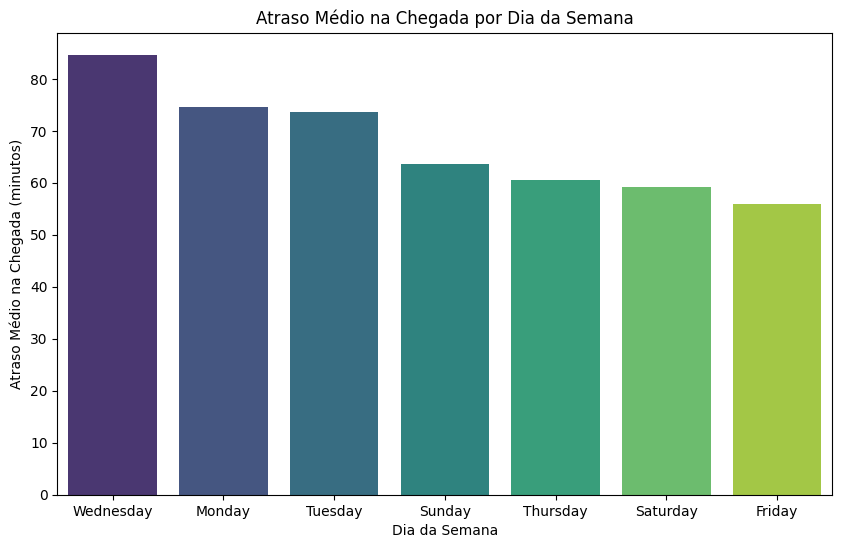

In [331]:
# Análise dos atrasos na chegada por dia da semana
arrival_delay_weekday = df[df['delayed'] == 1].groupby('weekday_name')['arr_delay'].mean().reset_index()
arrival_delay_weekday = arrival_delay_weekday.sort_values(by='arr_delay', ascending=False)

print("Atraso médio na chegada por dia da semana:")
print(arrival_delay_weekday)

# Contagem dos atrasos na chegada por dia da semana
arrival_delay_times_week = (df[df['delayed'] == 1].groupby('weekday_name').size().reset_index(name='count').sort_values(by='count', ascending=False))

print("Atraso na chegada por dia da semana:")
print(arrival_delay_times_week)


# Gráfico de barras do atraso médio na chegada por dia da semana
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_name', y='arr_delay', data=arrival_delay_weekday, palette='viridis')
plt.title('Atraso Médio na Chegada por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Atraso Médio na Chegada (minutos)')
plt.show()

#### Atrasos na Chegada por Período do Dia

Atraso médio na chegada por período do dia:
  scheduled_dep_period  arr_delay
1              Morning  73.800570
3              Red-Eye  70.192488
2                Night  68.253617
0            Afternoon  66.745960


C:\Users\Book\AppData\Local\Temp\ipykernel_12028\4282157717.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='scheduled_dep_period', y='arr_delay', data=arrival_delay_period, palette='viridis')


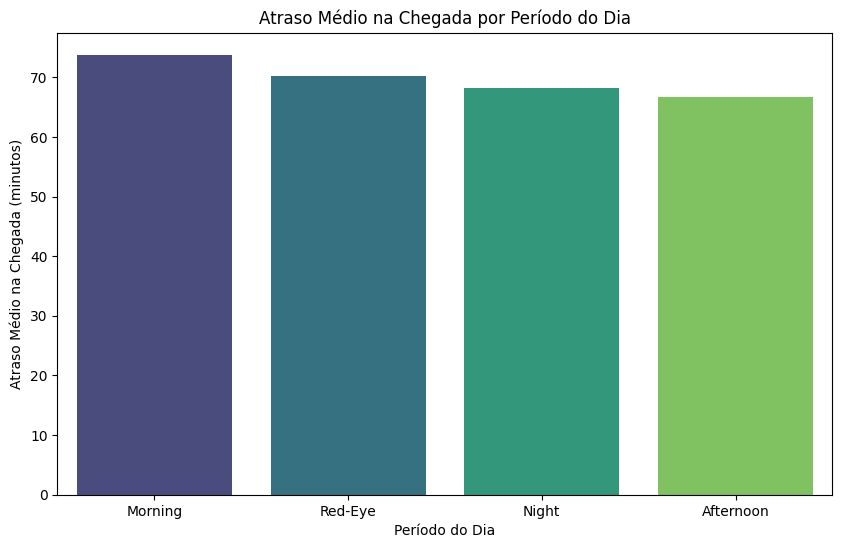

In [332]:
# Análise dos atrasos na chegada por perído do dia
arrival_delay_period = df[df['delayed'] == 1].groupby('scheduled_dep_period')['arr_delay'].mean().reset_index()
arrival_delay_period = arrival_delay_period.sort_values(by='arr_delay', ascending=False)

print("Atraso médio na chegada por período do dia:")
print(arrival_delay_period)

# Gráfico de barras do atraso médio na chegada por período do dia
plt.figure(figsize=(10, 6))
sns.barplot(x='scheduled_dep_period', y='arr_delay', data=arrival_delay_period, palette='viridis')
plt.title('Atraso Médio na Chegada por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Atraso Médio na Chegada (minutos)')
plt.show()

#### Heatmap — Taxa de Atraso por Dia da Semana vs. Hora Programada

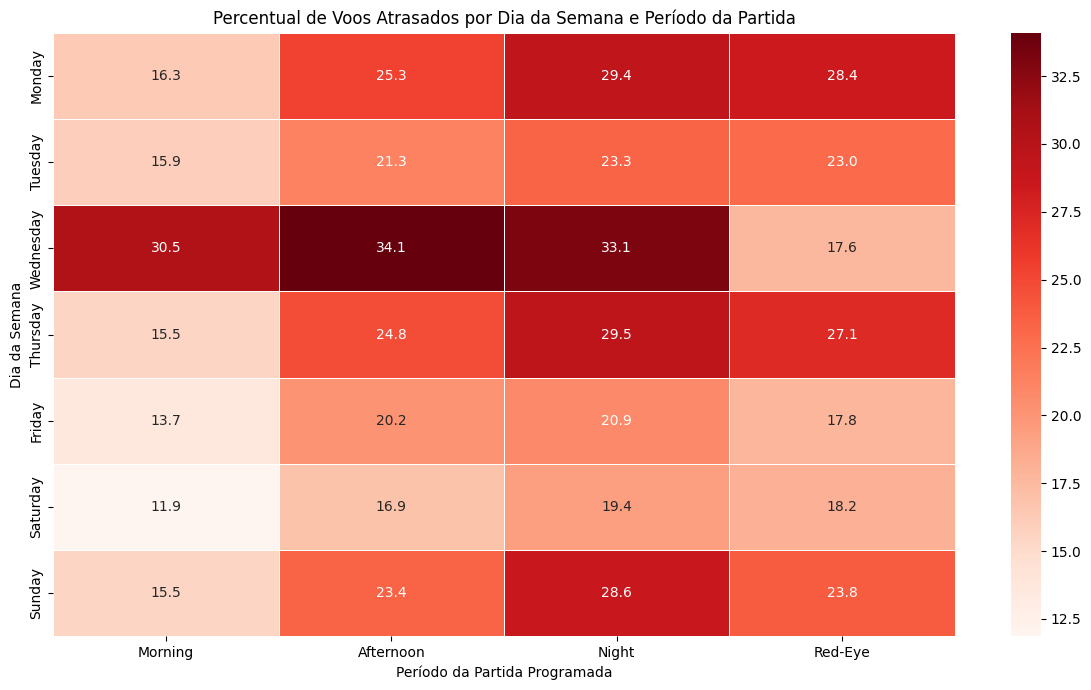

In [333]:
# pivot table
heatmap_date_pivot = df.pivot_table(
    index='weekday_name',
    columns='scheduled_dep_period',
    values='delayed',
    aggfunc='mean'
) * 100

# listas com a ordem certa para os eixos
days_ord = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

time_ord = ['Morning', 'Afternoon', 'Night', 'Red-Eye'] # Ou ['Madrugada', 'Manhã', 'Tarde', 'Noite']

# 3. Reordenar o DataFrame da pivot table USANDO AS LISTAS DE ORDEM
#    Esta é a única etapa de reindexação necessária.
heatmap_ord = heatmap_date_pivot.reindex(index=days_ord, columns=time_ord)

# 4. Plotar o heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_ord, annot=True, fmt=".1f", cmap="Reds", linewidths=.5)
plt.title('Percentual de Voos Atrasados por Dia da Semana e Período da Partida')
plt.xlabel('Período da Partida Programada')
plt.ylabel('Dia da Semana')
plt.tight_layout()
plt.show()

#### Motivo de Atrasos na Chegada por Dia da Semana

Principal causa de atraso na chegada por dia da semana:
   weekday_name main_delay_cause  count
31    Wednesday    Late Aircraft   9234
6        Monday    Late Aircraft   7441
15       Sunday          Carrier   6897
26      Tuesday    Late Aircraft   5885
20     Thursday          Carrier   5194
0        Friday          Carrier   4544
10     Saturday          Carrier   3785


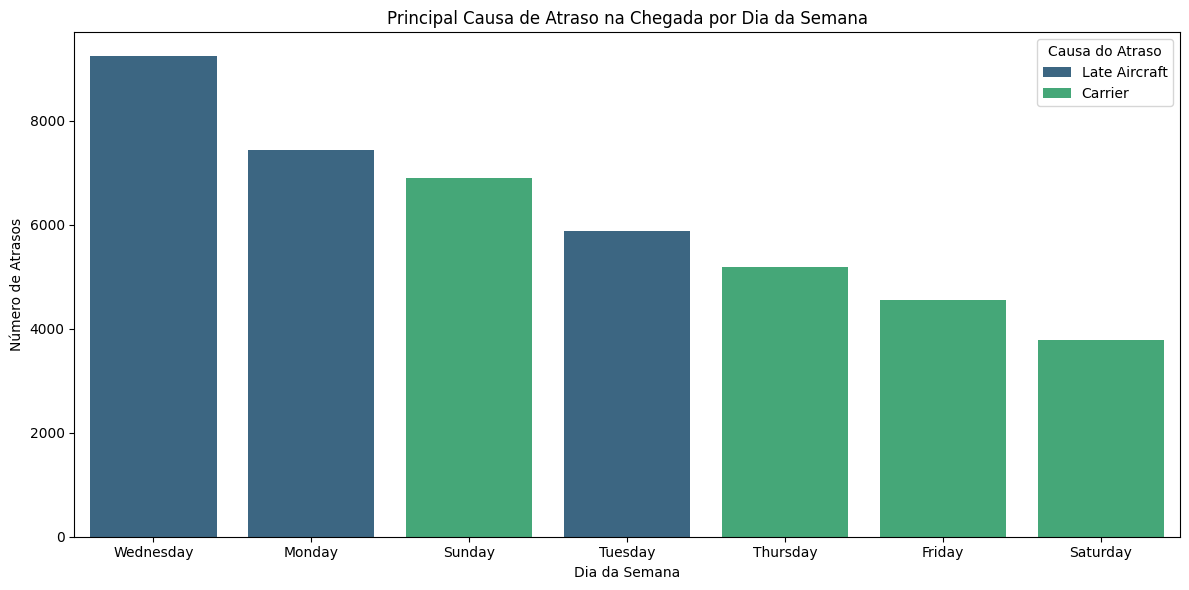

In [334]:
# Motivo de atrasos na chegada por dia da semana (somente voos atrasados)
arrival_delay_weekday_cause = (
    df[df['delayed'] == 1]  # Filtra apenas os voos atrasados
    .groupby(['weekday_name', 'main_delay_cause'])  # Agrupa por dia da semana e motivo do atraso
    .size()  # Conta o número de voos em cada grupo
    .reset_index(name='count')  # Renomeia a coluna de contagem para 'count'
)

# Selecionar apenas a principal causa para cada dia da semana
top_cause_per_day = arrival_delay_weekday_cause.loc[
    arrival_delay_weekday_cause.groupby('weekday_name')['count'].idxmax()  # Pega a causa com maior contagem por dia
]

# Ordenar o DataFrame por contagem de atrasos
top_cause_per_day = top_cause_per_day.sort_values(by='count', ascending=False)

print("Principal causa de atraso na chegada por dia da semana:")
print(top_cause_per_day)

# Gráfico de barras para visualizar a principal causa de atraso na chegada por dia da semana
plt.figure(figsize=(12, 6))
sns.barplot(
    x='weekday_name',
    y='count',
    hue='main_delay_cause',
    data=top_cause_per_day,
    palette='viridis'
)   
plt.title('Principal Causa de Atraso na Chegada por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Atrasos')
plt.legend(title='Causa do Atraso')
plt.tight_layout()
plt.show()


#### Motivo de Atrasos na Chegada por Horário (Período)

Principal causa de atraso na chegada por dia da semana:
   scheduled_dep_period main_delay_cause  count
1             Afternoon    Late Aircraft  18918
11                Night    Late Aircraft  14612
5               Morning          Carrier  14348
16              Red-Eye    Late Aircraft    267


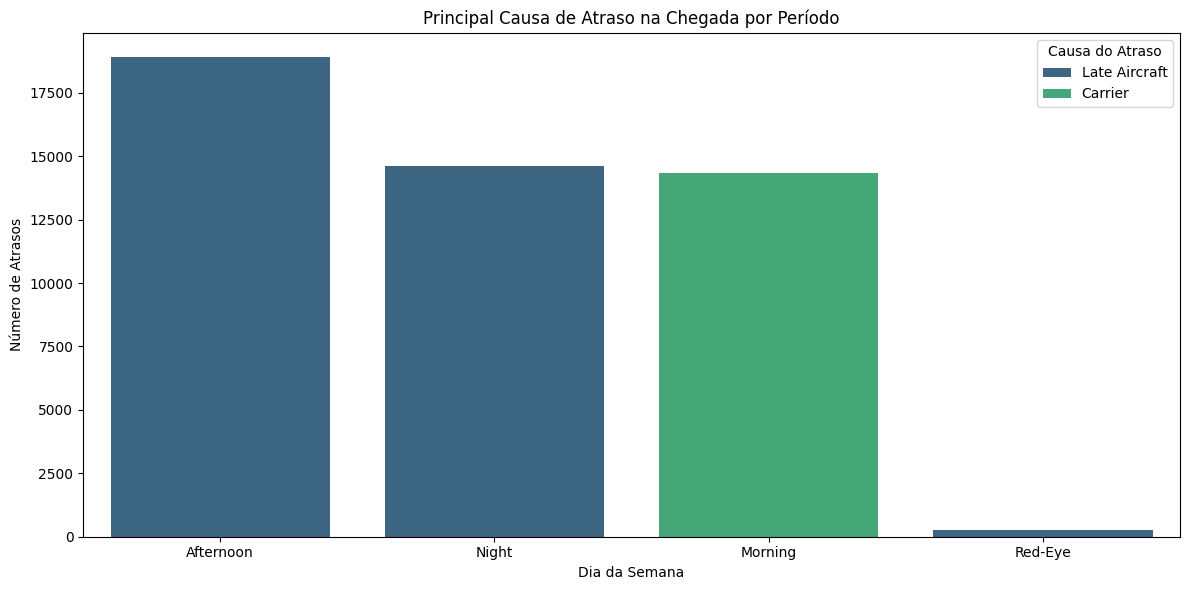

In [335]:
# Motivo de atrasos na chegada por período (somente voos atrasados)
arrival_delay_weekday_cause = (
    df[df['delayed'] == 1]  # Filtra apenas os voos atrasados
    .groupby(['scheduled_dep_period', 'main_delay_cause'])  # Agrupa por período e motivo do atraso
    .size()  # Conta o número de voos em cada grupo
    .reset_index(name='count')  # Renomeia a coluna de contagem para 'count'
)

# Selecionar apenas a principal causa por período do dia
top_cause_per_day = arrival_delay_weekday_cause.loc[
    arrival_delay_weekday_cause.groupby('scheduled_dep_period')['count'].idxmax()  # Pega a causa com maior contagem por dia
]

# Ordenar o DataFrame por contagem de atrasos
top_cause_per_day = top_cause_per_day.sort_values(by='count', ascending=False)

print("Principal causa de atraso na chegada por dia da semana:")
print(top_cause_per_day)

# Gráfico de barras para visualizar a principal causa de atraso na chegada por período do dia
plt.figure(figsize=(12, 6))
sns.barplot(
    x='scheduled_dep_period',
    y='count',
    hue='main_delay_cause',
    data=top_cause_per_day,
    palette='viridis'
)   
plt.title('Principal Causa de Atraso na Chegada por Período')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Atrasos')
plt.legend(title='Causa do Atraso')
plt.tight_layout()
plt.show()


### Quais as rotas que apresentam os maiores tempos médios de taxiamento, indicando possíveis gargalos no solo?

#### Rotas com Maior Taxiamento Total

In [336]:
# Agrupando por rota e calculando a média
taxi_mean_by_route = (df.groupby('route_id')['taxi_time_total'].mean().reset_index(name='mean_taxi_time').sort_values(by='mean_taxi_time', ascending=False))

# Exibindo as rotas com maior tempo médio de taxiamento
print("Rotas com maiores tempos médios de taxiamento:")
print(taxi_mean_by_route.head(10))


Rotas com maiores tempos médios de taxiamento:
        route_id  mean_taxi_time
2046  FNT to JAX      108.000000
2056  FSD to AUS       95.000000
623   BOS to GRR       94.000000
2139  GRR to FLL       72.444444
1313  DEN to ALB       67.000000
3853  ORD to KOA       61.000000
263   ATW to FLL       58.888889
264   ATW to LAS       54.555556
269   ATW to SFB       54.444444
1882  EWR to OGG       52.000000


#### Rotas com Maior Taxiamento na Partida

In [337]:
# Agrupando por rota e calculando a média
taxi_out_mean_by_route = (df.groupby('route_id')['taxi_out'].mean().reset_index(name='mean_taxi_out_time').sort_values(by='mean_taxi_out_time', ascending=False))

# Exibindo as rotas com maior tempo médio de taxiamento
print("Rotas com Maiores Tempos Médios de Taxiamento na Partida:")
print(taxi_out_mean_by_route.head(10))


Rotas com Maiores Tempos Médios de Taxiamento na Partida:
        route_id  mean_taxi_out_time
2056  FSD to AUS           88.000000
1313  DEN to ALB           63.000000
3968  PBI to IAD           46.333333
264   ATW to LAS           45.222222
269   ATW to SFB           45.000000
1922  EYW to IAD           43.000000
1235  DCA to DAB           43.000000
1069  COS to HOU           42.000000
263   ATW to FLL           41.444444
3890  ORD to RAP           40.666667


#### Rotas com Maior Taxiamento na Chegada

In [338]:
# Agrupando por rota e calculando a média
taxi_in_mean_by_route = (df.groupby('route_id')['taxi_in'].mean().reset_index(name='mean_taxi_in_time').sort_values(by='mean_taxi_in_time', ascending=False))

# Exibindo as rotas com maior tempo médio de taxiamento
print("Rotas com Maiores Tempos Médios de Taxiamento na Chegada:")
print(taxi_in_mean_by_route.head(10))


Rotas com Maiores Tempos Médios de Taxiamento na Chegada:
        route_id  mean_taxi_in_time
2046  FNT to JAX          95.000000
623   BOS to GRR          83.000000
4308  PIT to AUS          44.000000
2139  GRR to FLL          37.555556
5033  SJC to JAC          32.500000
2497  ILM to EWR          30.714286
4272  PIE to FSD          28.555556
4050  PGD to MDW          28.500000
2918  LBE to MCO          27.900000
3853  ORD to KOA          26.750000


### Quais rotas, períodos do dia e principais motivos de atraso estão associados aos atrasos mais longos, indicando potencial impacto financeiro adverso?

#### Rotas com Maiores Atrasos Médios na Chegada

In [339]:
# Atraso médio na chegada por rota (apenas voos atrasados)
arrival_delay_by_route = (
    df[df['delayed'] == 1]
    .groupby('route_id')['arr_delay']
    .mean()
    .reset_index(name='mean_arrival_delay')
    .sort_values(by='mean_arrival_delay', ascending=False)
)

print("Top 10 rotas com maiores atrasos médios na chegada:")
print(arrival_delay_by_route.head(10))


Top 10 rotas com maiores atrasos médios na chegada:
        route_id  mean_arrival_delay
617   BOS to VPS              1525.0
5289  VPS to BOS              1496.0
3477  MTJ to LGA              1181.0
4659  SFB to GFK               928.0
2429  ITO to LAX               878.0
5313  XNA to MSP               874.0
2305  IAH to HSV               823.0
5147  SYR to PIE               724.0
74    ANC to DFW               649.0
2564  KOA to PHX               572.5


#### Períodos do Dia com Maiores Atrasos

In [340]:
arrival_delay_by_period = (
    df[df['delayed'] == 1]
    .groupby('scheduled_dep_period')['arr_delay']
    .mean()
    .reset_index(name='mean_arrival_delay')
    .sort_values(by='mean_arrival_delay', ascending=False)
)

print("\nPeríodos do dia com maiores atrasos médios:")
print(arrival_delay_by_period)



Períodos do dia com maiores atrasos médios:
  scheduled_dep_period  mean_arrival_delay
1              Morning           73.800570
3              Red-Eye           70.192488
2                Night           68.253617
0            Afternoon           66.745960


#### Motivos mais Associados aos Maiores Atrasos Médios

In [341]:
arrival_delay_by_cause = (
    df[df['delayed'] == 1]
    .groupby('main_delay_cause')['arr_delay']
    .mean()
    .reset_index(name='mean_arrival_delay')
    .sort_values(by='mean_arrival_delay', ascending=False)
)

print("\nPrincipais causas de atraso (por tempo médio de atraso):")
print(arrival_delay_by_cause)



Principais causas de atraso (por tempo médio de atraso):
           main_delay_cause  mean_arrival_delay
4                   Weather          119.184958
1             Late Aircraft           77.385670
0                   Carrier           73.310952
2  National Aviation System           48.309198
3                  Security           44.636612


# Análise de Coorte

## Criando a Coluna Coorte

In [342]:
def define_cohort(date):
    if pd.Timestamp('2023-01-01') <= date <= pd.Timestamp('2023-01-10'):
        return 'Crise Climática Inicial'
    elif pd.Timestamp('2023-01-11') <= date <= pd.Timestamp('2023-01-12'):
        return 'Falha NOTAM'
    elif pd.Timestamp('2023-01-13') <= date <= pd.Timestamp('2023-01-16'):
        return 'Recuperação Pós-Crise'
    elif pd.Timestamp('2023-01-17') <= date <= pd.Timestamp('2023-01-25'):
        return 'Tempestade Centro-Oeste'
    elif pd.Timestamp('2023-01-26') <= date <= pd.Timestamp('2023-01-31'):
        return 'Winter Storm Mara'
    else:
        return 'Fora do Intervalo'

df['cohort'] = df['flight_date'].apply(define_cohort)


### Validação Inicial das Coortes

In [343]:
# Confirmar que as datas estão alinhadas com os eventos históricos documentados

# Contagem de registros por coorte
print("Distribuição das Coortes:")
print(df['cohort'].value_counts())

# Verificação de datas extremas por coorte
print("\nPeríodo de cada Coorte:")
print(df.groupby('cohort')['flight_date'].agg(['min', 'max']))



Distribuição das Coortes:
cohort
Crise Climática Inicial    171374
Tempestade Centro-Oeste    157537
Winter Storm Mara          105913
Recuperação Pós-Crise       68366
Falha NOTAM                 35647
Name: count, dtype: int64

Período de cada Coorte:
                               min        max
cohort                                       
Crise Climática Inicial 2023-01-01 2023-01-10
Falha NOTAM             2023-01-11 2023-01-12
Recuperação Pós-Crise   2023-01-13 2023-01-16
Tempestade Centro-Oeste 2023-01-17 2023-01-25
Winter Storm Mara       2023-01-26 2023-01-31


## Cria DataFrames Separados para Voos Atrasados e Cancelados

In [344]:
df_delayed = df[df['delayed'] == 1].copy()
df_cancelled = df[df['cancelled'] == 1].copy()

## Calculando as Métricas por Coorte

### Análise de Voos Atrasados

In [345]:
# Tempo médio/máximo de atraso
delayed_analysis = df_delayed.groupby('cohort').agg(
    mean_delayed=('arr_delay', 'mean'),
    max_delayed=('arr_delay', 'max'),
    delayed_flights=('delayed', 'count')
).reset_index()

# Principais causas de atraso
delayed_cause = df_delayed.groupby(['cohort', 'main_delay_cause']).size().unstack(fill_value=0)


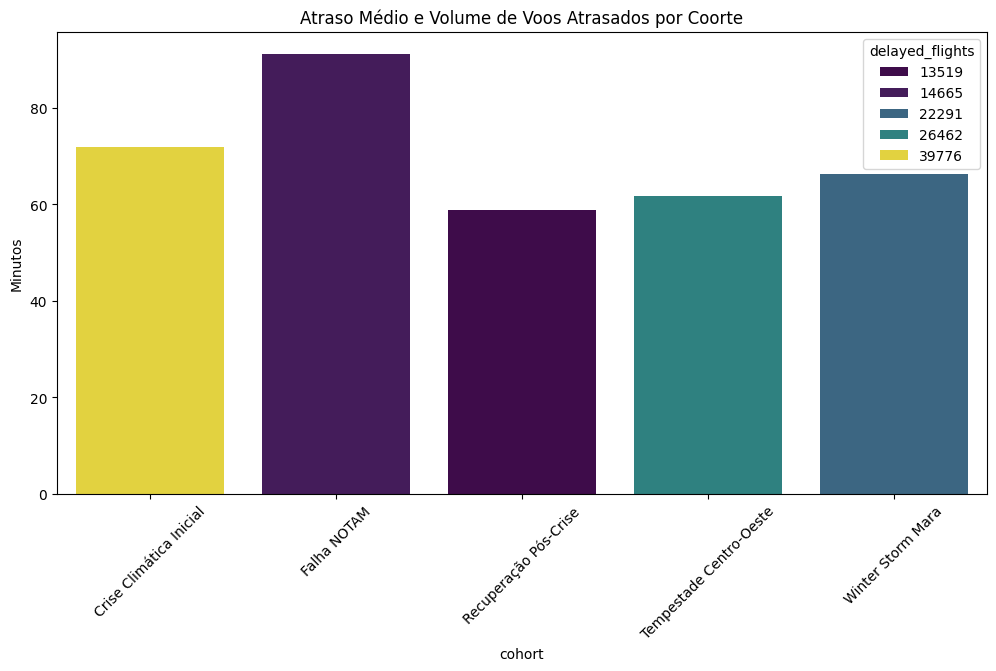

In [346]:
plt.figure(figsize=(12,6))
sns.barplot(data=delayed_analysis, x='cohort', y='mean_delayed', hue='delayed_flights', palette='viridis')
plt.title('Atraso Médio e Volume de Voos Atrasados por Coorte')
plt.ylabel('Minutos')
plt.xticks(rotation=45)
plt.show()

### Análise de Voos Cancelados 

In [347]:
# Motivos de cancelamento
cancelled_causes = df_cancelled.groupby(['cohort', 'cancellation_cause']).size().unstack(fill_value=0)

# Aeroportos mais impactados
affected_airports = df_cancelled.groupby(['cohort', 'origin']).size().groupby('cohort').nlargest(3)


<Figure size 1600x600 with 0 Axes>

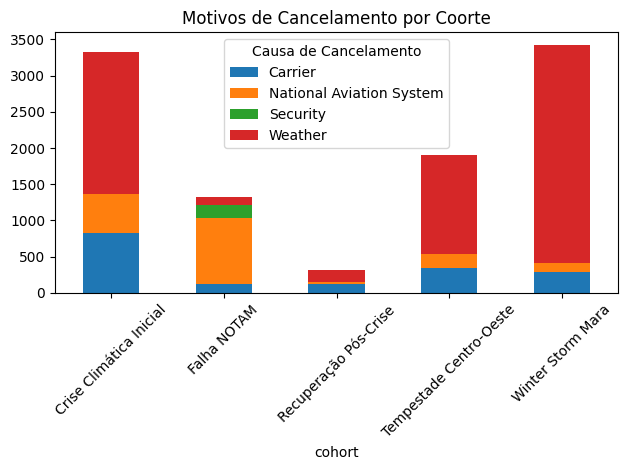

In [348]:
plt.figure(figsize=(16,6))
cancelled_causes.plot(kind='bar', stacked=True)
plt.title('Motivos de Cancelamento por Coorte')
plt.xticks(rotation=45)
plt.legend(title='Causa de Cancelamento')
plt.tight_layout()
plt.show()


### Análise Integrada 

#### Taxa de Problemas por Coorte

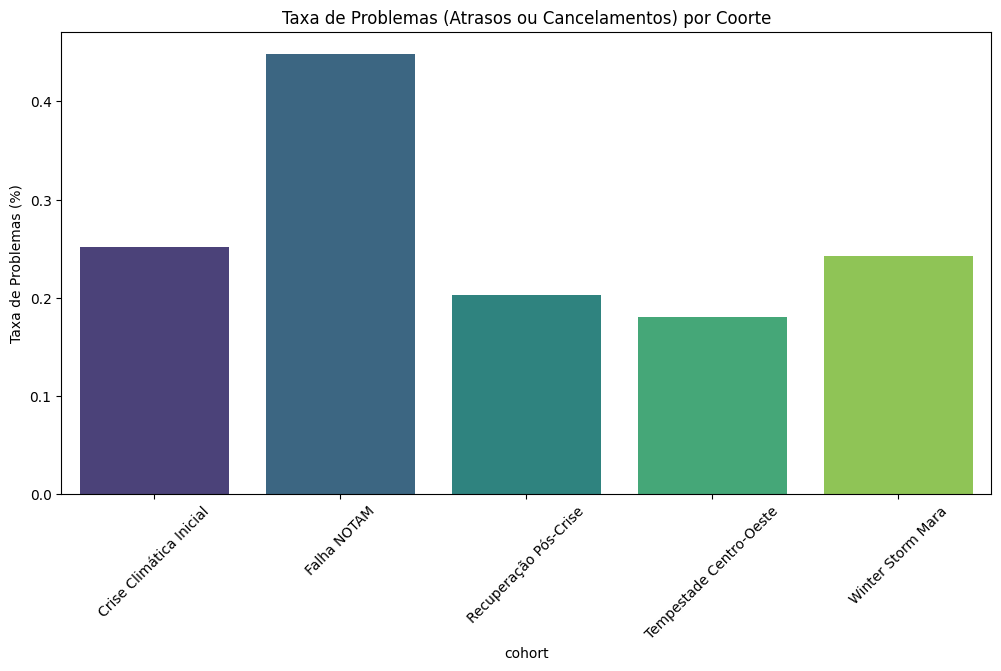

In [349]:
df['causes'] = df['delayed'] | df['cancelled']  # 1 se atrasado OU cancelado
taxa_problemas = df.groupby('cohort')['causes'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=taxa_problemas, x='cohort', y='causes', hue='cohort', palette='viridis', legend=False)
plt.title('Taxa de Problemas (Atrasos ou Cancelamentos) por Coorte')
plt.ylabel('Taxa de Problemas (%)')
plt.xticks(rotation=45)
plt.show()


#### Heatmap de Correlação (Apenas Atrasos)

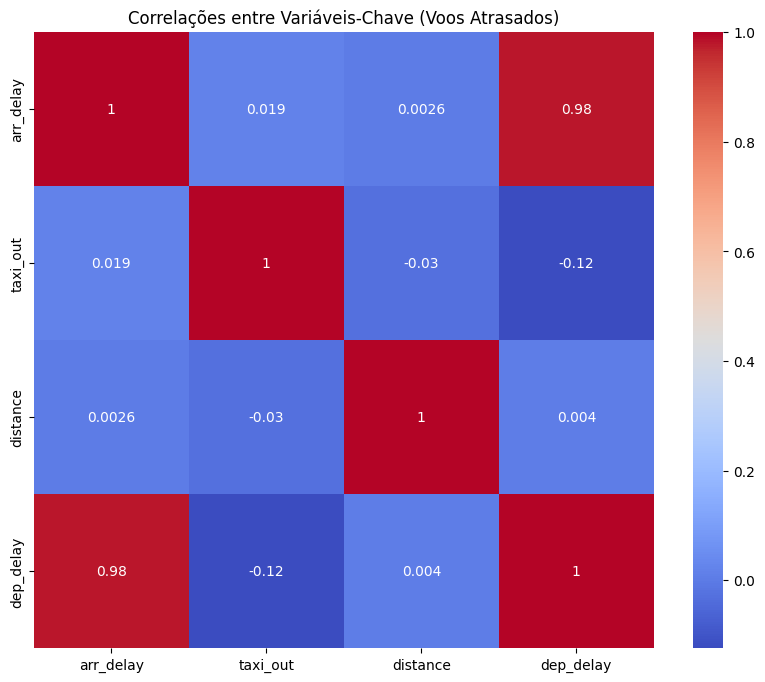

In [350]:
correlacoes = df_delayed[['arr_delay', 'taxi_out', 'distance', 'dep_delay']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.title('Correlações entre Variáveis-Chave (Voos Atrasados)')
plt.show()


#### Evolução Temporal por Coorte

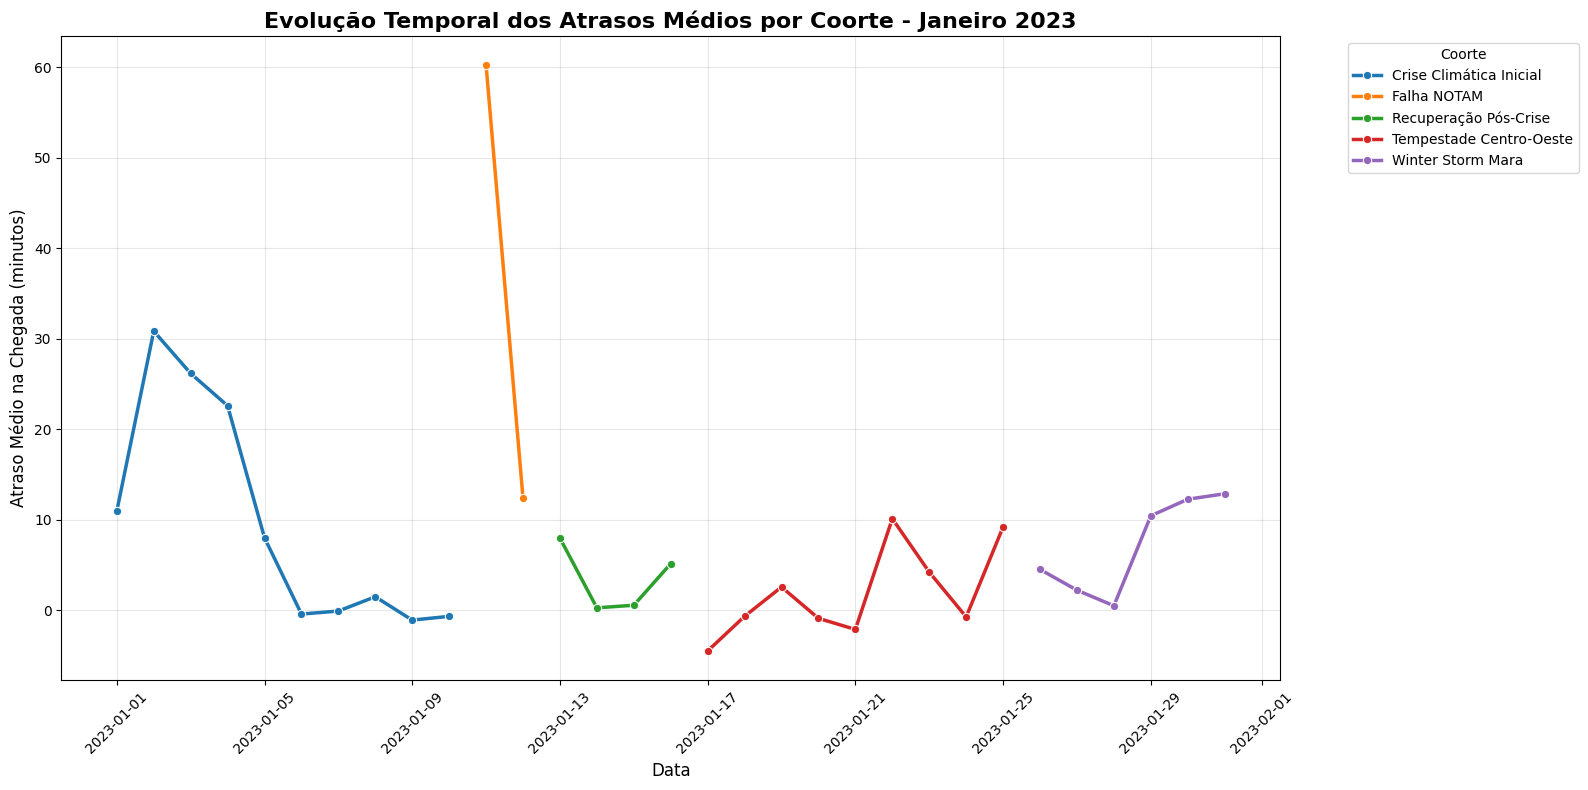

In [353]:
# Calcular atraso médio por data e coorte
evolucao_temporal = df.groupby(['flight_date', 'cohort'])['arr_delay'].mean().reset_index()

# Gráfico de linha temporal por coorte
plt.figure(figsize=(16, 8))
sns.lineplot(data=evolucao_temporal, x='flight_date', y='arr_delay', hue='cohort', 
             marker='o', linewidth=2.5, markersize=6)

plt.title('Evolução Temporal dos Atrasos Médios por Coorte - Janeiro 2023', 
          fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Atraso Médio na Chegada (minutos)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Coorte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Evolução Temporal Geral com Marcos de Eventos

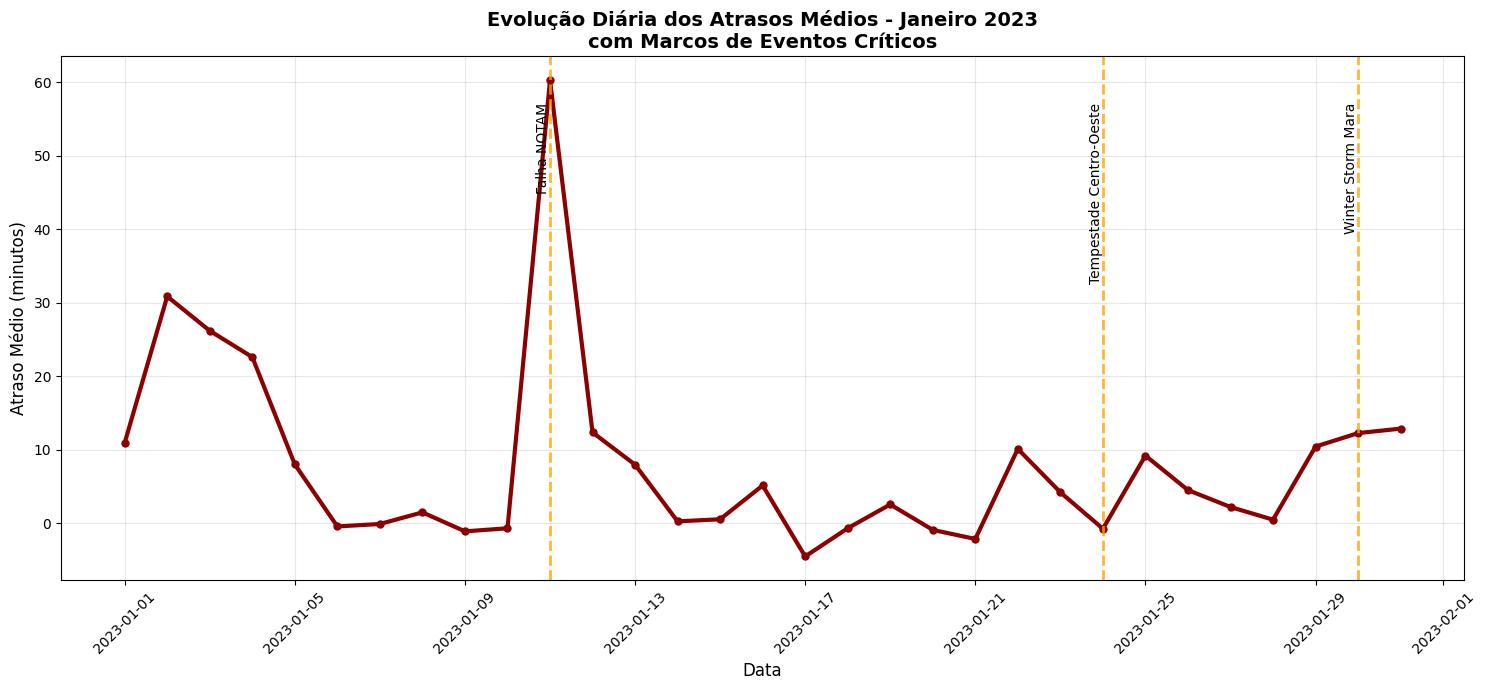

In [354]:
# Calcular atraso médio diário geral
atraso_diario = df.groupby('flight_date')['arr_delay'].mean().reset_index()

plt.figure(figsize=(15, 7))
plt.plot(atraso_diario['flight_date'], atraso_diario['arr_delay'], 
         color='darkred', linewidth=3, marker='o', markersize=5)

# Destacar eventos críticos com linhas verticais
eventos_criticos = {
    '2023-01-11': 'Falha NOTAM',
    '2023-01-24': 'Tempestade Centro-Oeste', 
    '2023-01-30': 'Winter Storm Mara'
}

for data, evento in eventos_criticos.items():
    plt.axvline(x=pd.to_datetime(data), color='orange', linestyle='--', alpha=0.8, linewidth=2)
    plt.text(pd.to_datetime(data), plt.ylim()[1]*0.9, evento, 
             rotation=90, fontsize=10, ha='right', va='top')

plt.title('Evolução Diária dos Atrasos Médios - Janeiro 2023\ncom Marcos de Eventos Críticos', 
          fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Atraso Médio (minutos)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Comparação de Taxa de Problemas ao Longo do Tempo

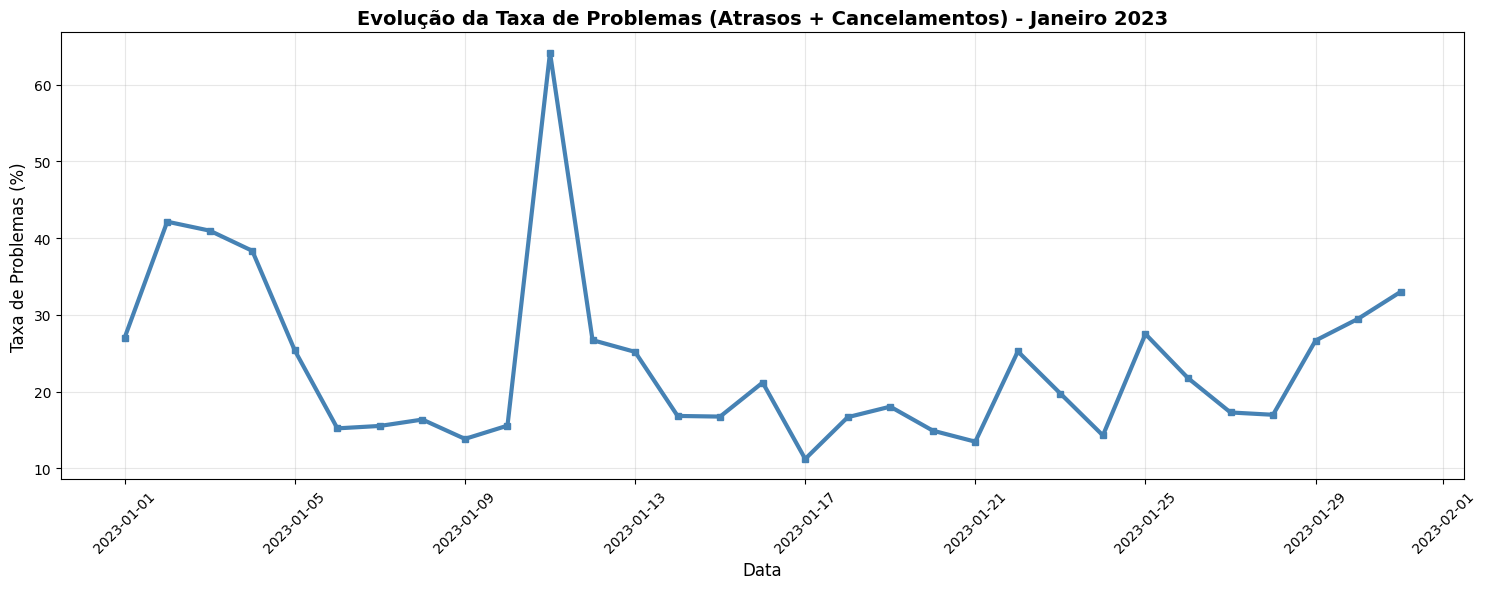

In [355]:
# Calcular taxa de problemas diária
df['problema'] = (df['delayed'] == 1) | (df['cancelled'] == 1)
taxa_problemas_diaria = df.groupby('flight_date')['problema'].mean().reset_index()
taxa_problemas_diaria['problema_percent'] = taxa_problemas_diaria['problema'] * 100

plt.figure(figsize=(15, 6))
plt.plot(taxa_problemas_diaria['flight_date'], taxa_problemas_diaria['problema_percent'], 
         color='steelblue', linewidth=3, marker='s', markersize=5)

plt.title('Evolução da Taxa de Problemas (Atrasos + Cancelamentos) - Janeiro 2023', 
          fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Taxa de Problemas (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Tabela Consolidada

In [351]:
final_analysis = pd.merge(
    delayed_analysis,
    cancelled_causes,
    on='cohort'
).merge(
    taxa_problemas,
    on='cohort'
)

print("\nRelatório Consolidado:")
print(final_analysis)



Relatório Consolidado:
                    cohort  mean_delayed  max_delayed  delayed_flights  \
0  Crise Climática Inicial     71.958141       2557.0            39776   
1              Falha NOTAM     91.227139       1740.0            14665   
2    Recuperação Pós-Crise     58.937865       2027.0            13519   
3  Tempestade Centro-Oeste     61.654486       3063.0            26462   
4        Winter Storm Mara     66.244583       2687.0            22291   

   Carrier  National Aviation System  Security  Weather    causes  
0      831                       535         3     1962  0.251538  
1      122                       909       182      112  0.448565  
2      128                        25         0      157  0.202279  
3      341                       197         0     1364  0.180047  
4      285                       126         0     3016  0.242822  


In [352]:
print("\nPrincipais Recomendações por Coorte:")
for coorte in delayed_analysis['cohort']:
    main_cause = delayed_cause.loc[coorte].idxmax()
    print(f"- {coorte}: Investir em mitigação de {main_cause} (Responsável por {delayed_cause.loc[coorte].max()} atrasos)")



Principais Recomendações por Coorte:
- Crise Climática Inicial: Investir em mitigação de Late Aircraft (Responsável por 14585 atrasos)
- Falha NOTAM: Investir em mitigação de Late Aircraft (Responsável por 6744 atrasos)
- Recuperação Pós-Crise: Investir em mitigação de Carrier (Responsável por 4668 atrasos)
- Tempestade Centro-Oeste: Investir em mitigação de Carrier (Responsável por 8800 atrasos)
- Winter Storm Mara: Investir em mitigação de Carrier (Responsável por 7350 atrasos)


# Conclusão da Análise

A análise dos dados de voos revelou padrões claros de atrasos e cancelamentos, bem como seus principais fatores associados.  

Os resultados apontam que:

- **Atrasos e Cancelamentos:** O período de "Falha NOTAM" apresentou a maior taxa de problemas (atrasos ou cancelamentos), seguido pela "Crise Climática Inicial" e "Winter Storm Mara". Eventos climáticos extremos e falhas sistêmicas tiveram impacto significativo na operação aérea.

- **Principais Motivos:** O clima foi o principal responsável pelos cancelamentos, especialmente em aeroportos e rotas críticas. Para atrasos, causas como "Late Aircraft" (efeito cascata) e "Carrier" (companhia aérea) foram predominantes, variando conforme o período do dia.

- **Rotas e Aeroportos Críticos:** Algumas rotas, como "DEN to ASE" e "ASE to DEN", e aeroportos como DEN, DFW e LGA, concentraram volumes elevados de cancelamentos, principalmente por condições meteorológicas adversas.

- **Padrões Temporais:** Os atrasos tendem a ser mais frequentes e severos em determinados horários e períodos do dia, com destaque para tardes e noites, além de variações relevantes entre dias da semana.

- **Taxiamento:** Certas rotas apresentaram tempos médios de taxiamento elevados, sugerindo possíveis gargalos operacionais em solo.

- **Impacto Operacional:** O efeito cascata de atrasos ("Late Aircraft") reforça a necessidade de estratégias de mitigação para evitar propagação de atrasos ao longo do dia.

## Recomendações

- Investir em infraestrutura e processos para mitigar impactos de eventos climáticos, especialmente em aeroportos e rotas críticas.

- Aprimorar a gestão operacional para reduzir atrasos em cadeia, com foco em horários de pico e períodos mais críticos.

- Monitorar continuamente os principais motivos de atrasos e cancelamentos, ajustando políticas e recursos conforme sazonalidade e eventos extraordinários.

- Priorizar ações preventivas em rotas e aeroportos com histórico recorrente de problemas, visando maior eficiência e satisfação dos passageiros.

A análise evidencia a importância de uma abordagem integrada entre companhias aéreas, aeroportos e órgãos reguladores para minimizar impactos e aprimorar a pontualidade do transporte aéreo.